## Priprema i predobrada podataka

### Importovanje potrebnih modula

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score, classification_report
from sklearn.metrics import average_precision_score

### Učitavanje podataka

In [2]:
df = pd.read_excel('Dry_Bean_Dataset.xlsx')
print("Data Shape:",df.shape) 
df.head(10) 

Data Shape: (13611, 17)


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


### Informacije o podacima

In [3]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
for column in df.columns:
    print(column,df[column].nunique())

Area 12011
Perimeter 13416
MajorAxisLength 13543
MinorAxisLength 13543
AspectRation 13543
Eccentricity 13543
ConvexArea 12066
EquivDiameter 12011
Extent 13535
Solidity 13526
roundness 13543
Compactness 13543
ShapeFactor1 13543
ShapeFactor2 13543
ShapeFactor3 13543
ShapeFactor4 13543
Class 7


### Izbacivanje duplikata

In [6]:
df.drop_duplicates(inplace=True)

### Provera nedostajućih vrednosti

In [77]:
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing values")

No missing values


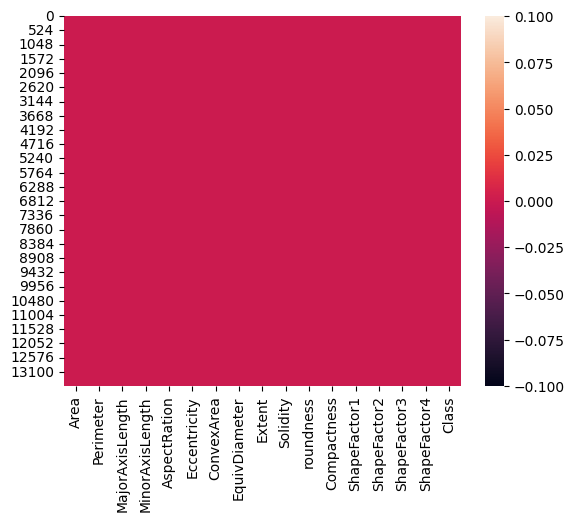

In [78]:
sns.heatmap(df.isnull())
plt.show()

### Raspodela podataka po klasama

In [7]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [8]:
print(df.Class)

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 13543, dtype: object


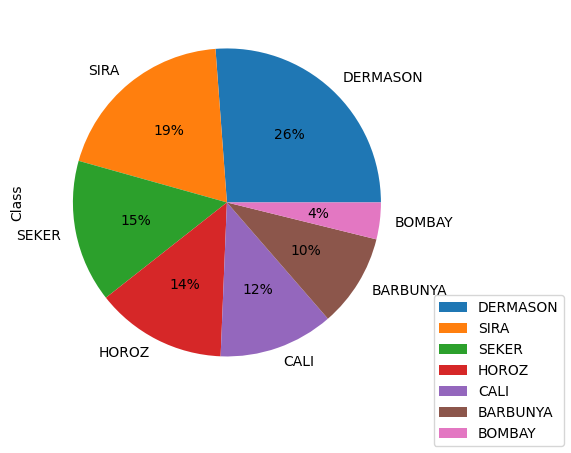

In [9]:
plt.figure(figsize=(7, 5))
pie = df.Class.value_counts().plot(kind='pie', autopct='%1.0f%%')
pie.figure.set_size_inches(7, 5)
pie.figure.legend(loc='lower right')
#plt.savefig("graphs/classdistribution.jpg")
plt.show()

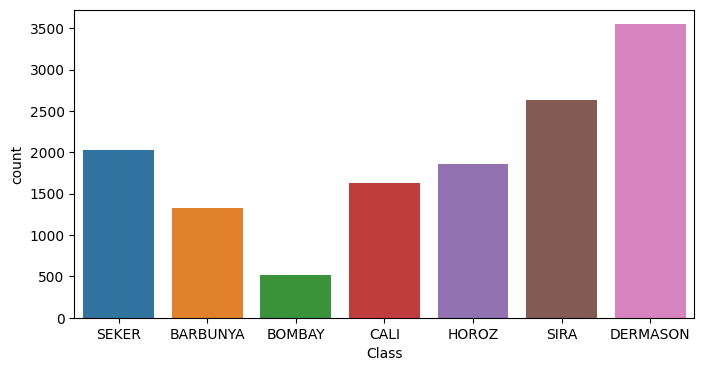

In [10]:
plt.figure(figsize=(8,4))
sns.countplot(x='Class',data=df)
plt.show()

## Deskriptivna analiza

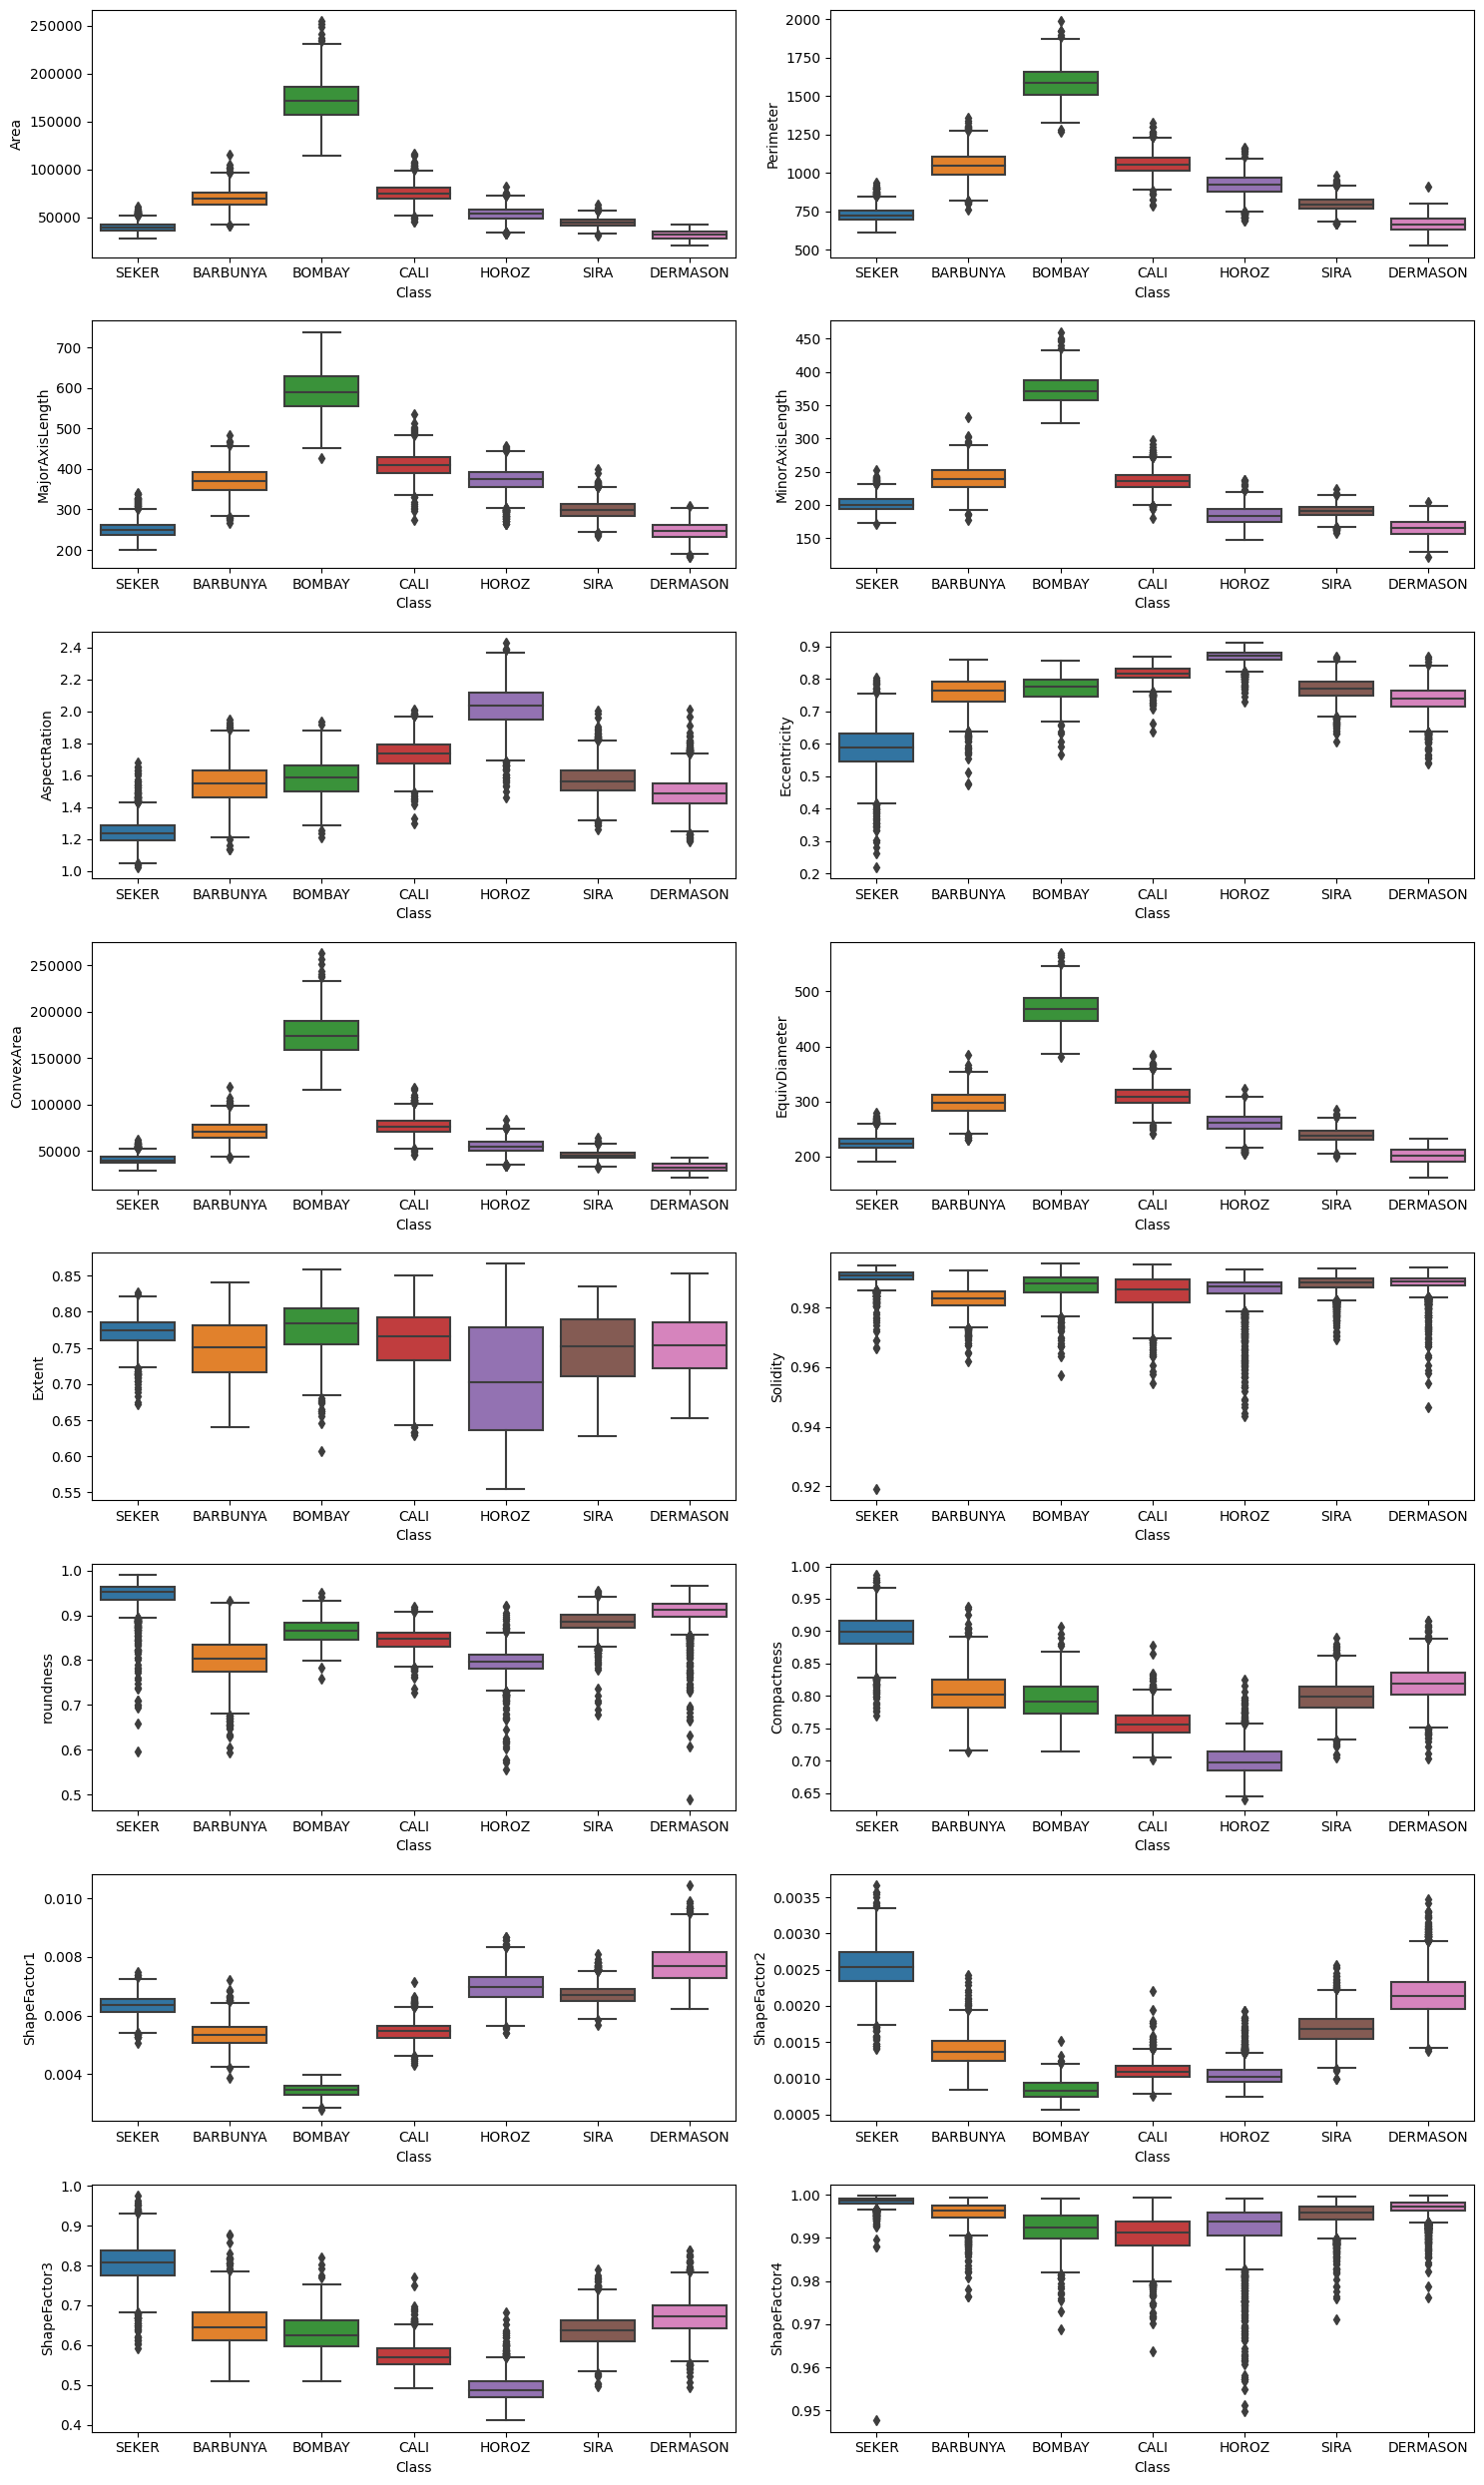

In [13]:
Numeric_cols = df.drop(columns=['Class']).columns
fig, ax = plt.subplots(8, 2, figsize=(15, 25))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(x=df['Class'], y= df[variable], ax=subplot)
plt.tight_layout()

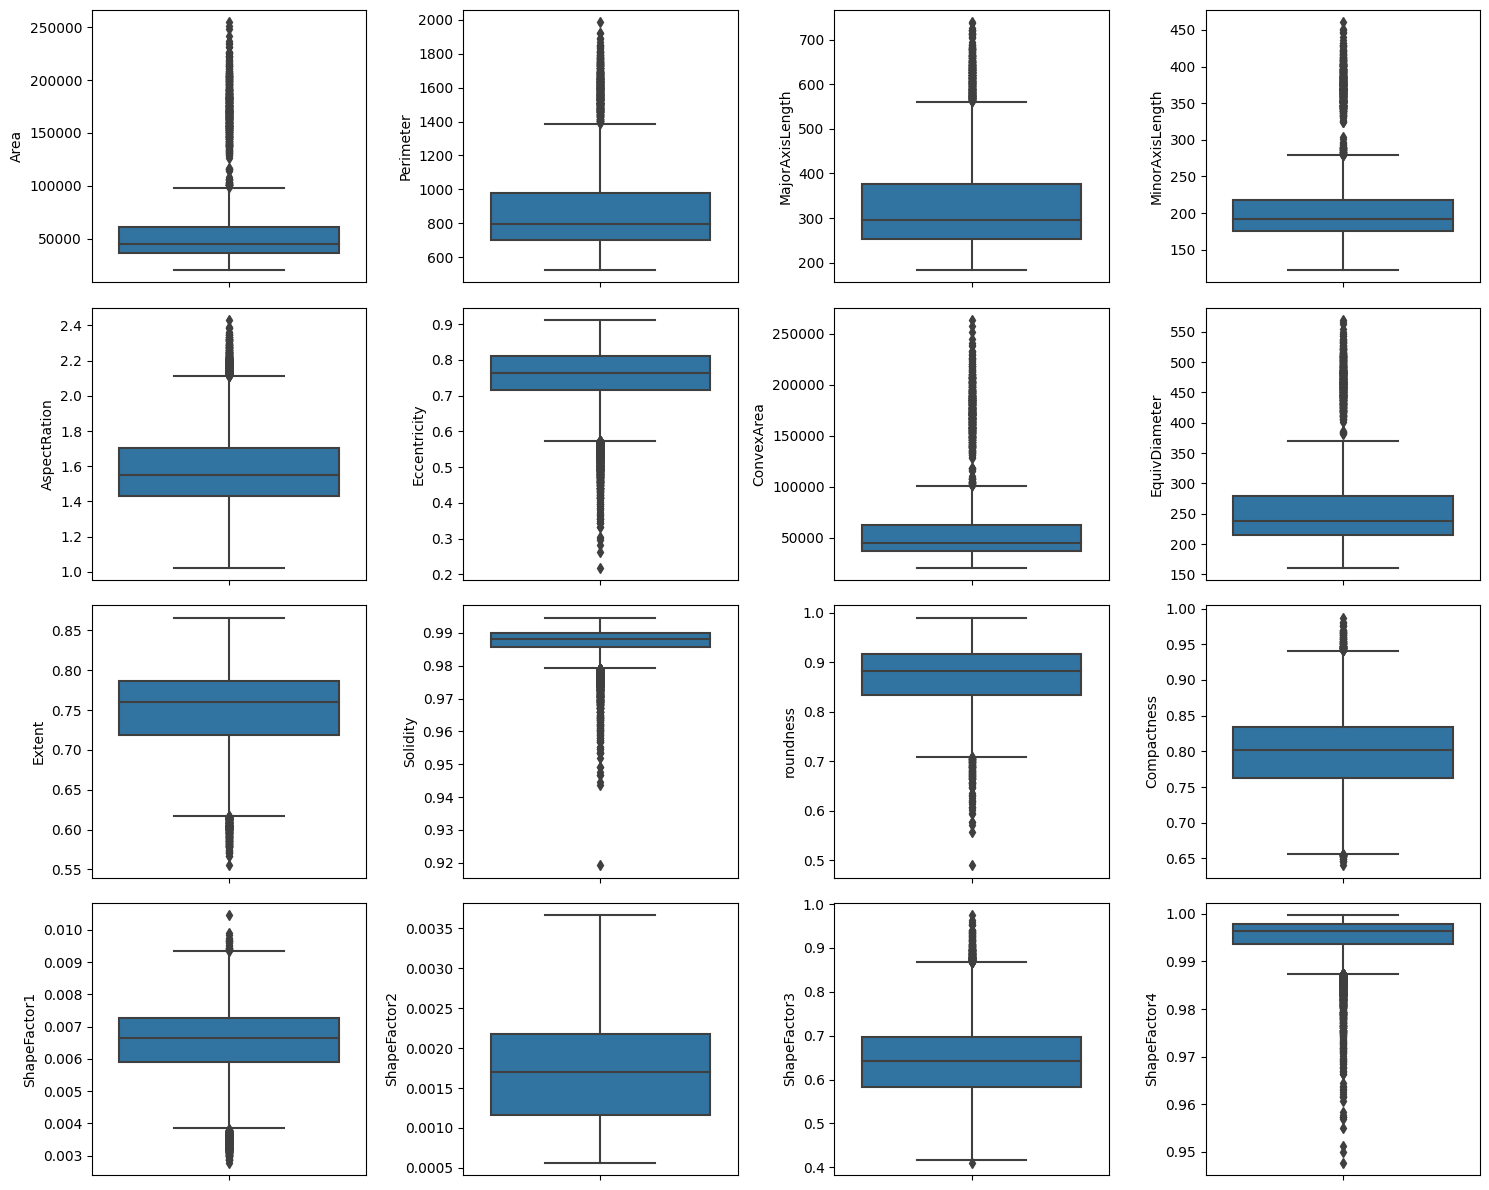

In [14]:
fig, ax = plt.subplots(4, 4, figsize=(15, 12))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(y= df[variable], ax=subplot)
plt.tight_layout()

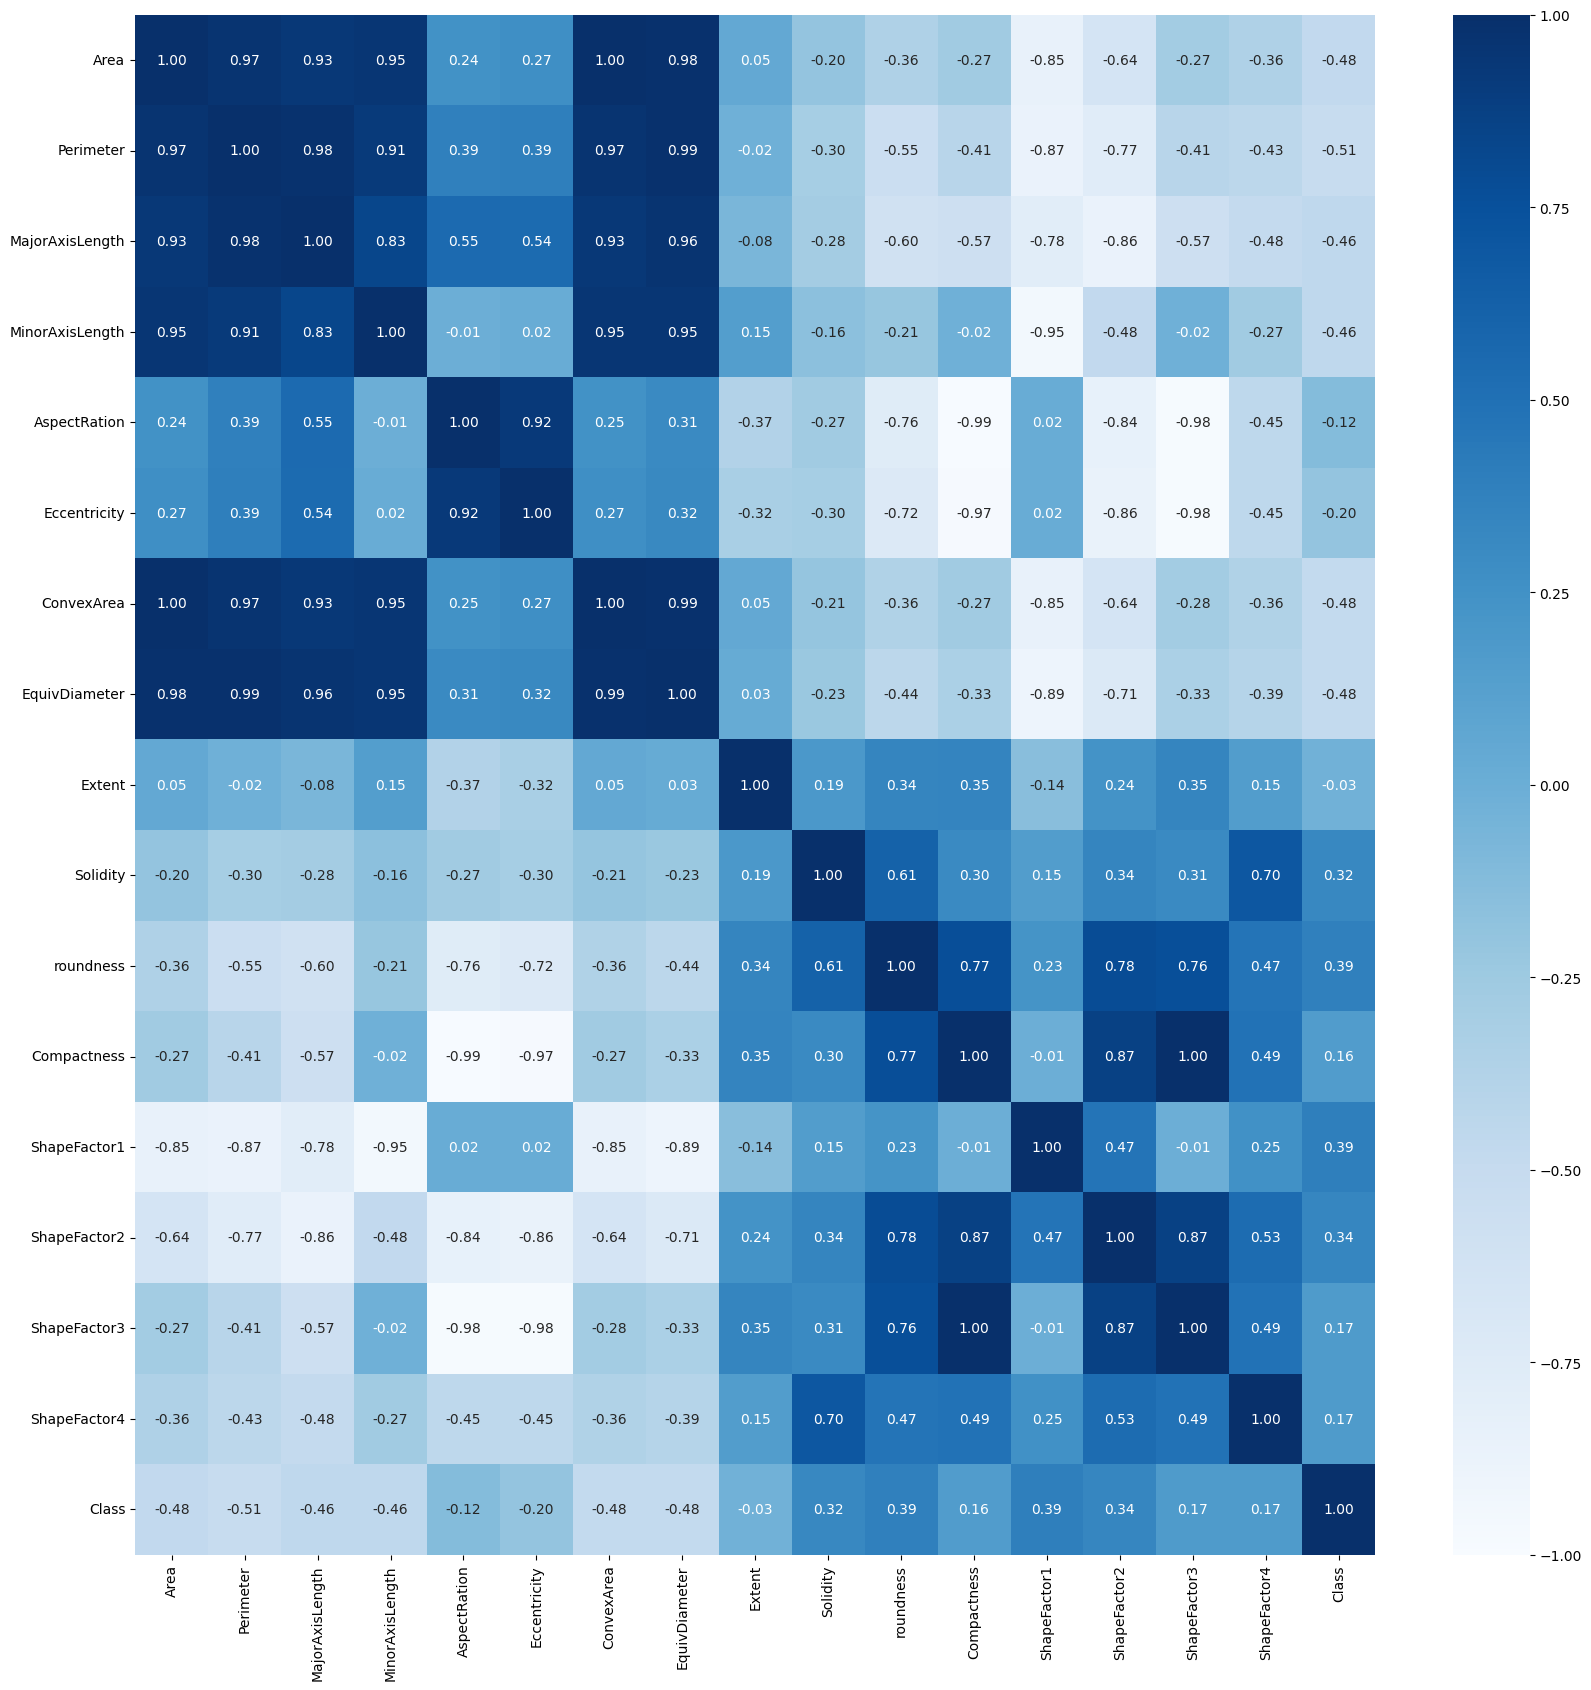

In [15]:
labelencoder = LabelEncoder()
#df['Class'] = labelencoder.fit_transform(df['Class'])
df.Class=labelencoder.fit_transform(df.Class)
df.head()

plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), 
            annot = True, 
            cmap = "Blues",
            fmt = ".2f",
            vmin = -1.00, vmax = 1.00)
plt.show()

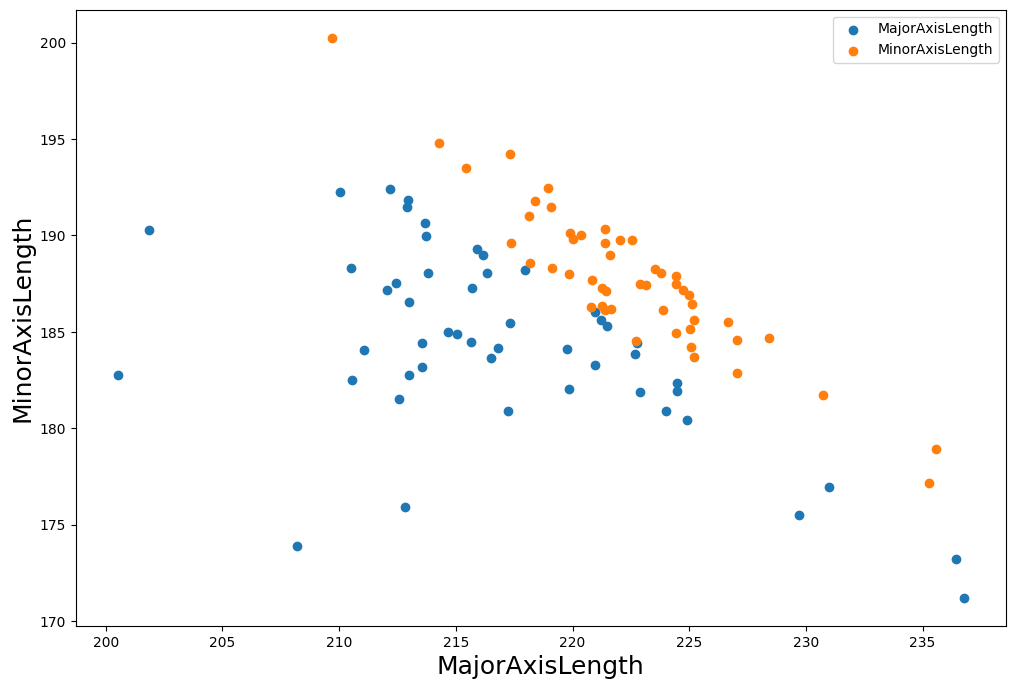

In [16]:

plt.figure(figsize=(12, 8))
plt.scatter(df[:50]['MajorAxisLength'], df[:50]['MinorAxisLength'], label='MajorAxisLength')
plt.scatter(df[50:100]['MajorAxisLength'], df[50:100]['MinorAxisLength'], label='MinorAxisLength')
plt.xlabel('MajorAxisLength', fontsize=18)
plt.ylabel('MinorAxisLength', fontsize=18)
plt.legend()

plt.show()

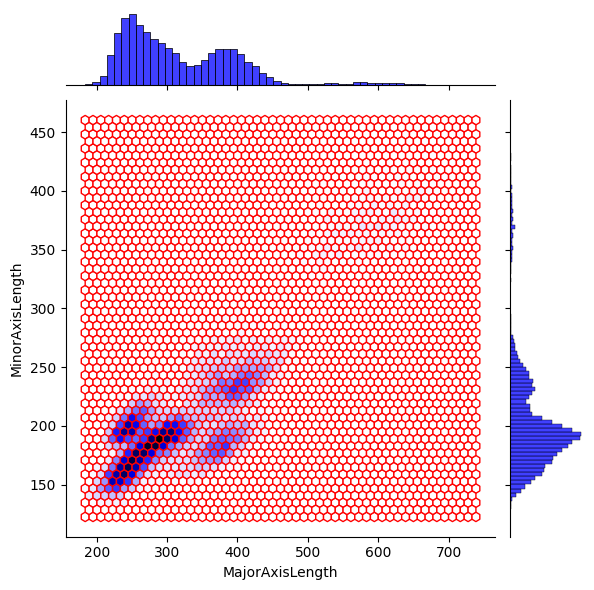

In [17]:
sns.jointplot(x='MajorAxisLength',y='MinorAxisLength',data=df,kind='hex',dropna=True,color="blue",edgecolor="red")
plt.show()

In [18]:
# sns.pairplot(data=df)
# plt.show()

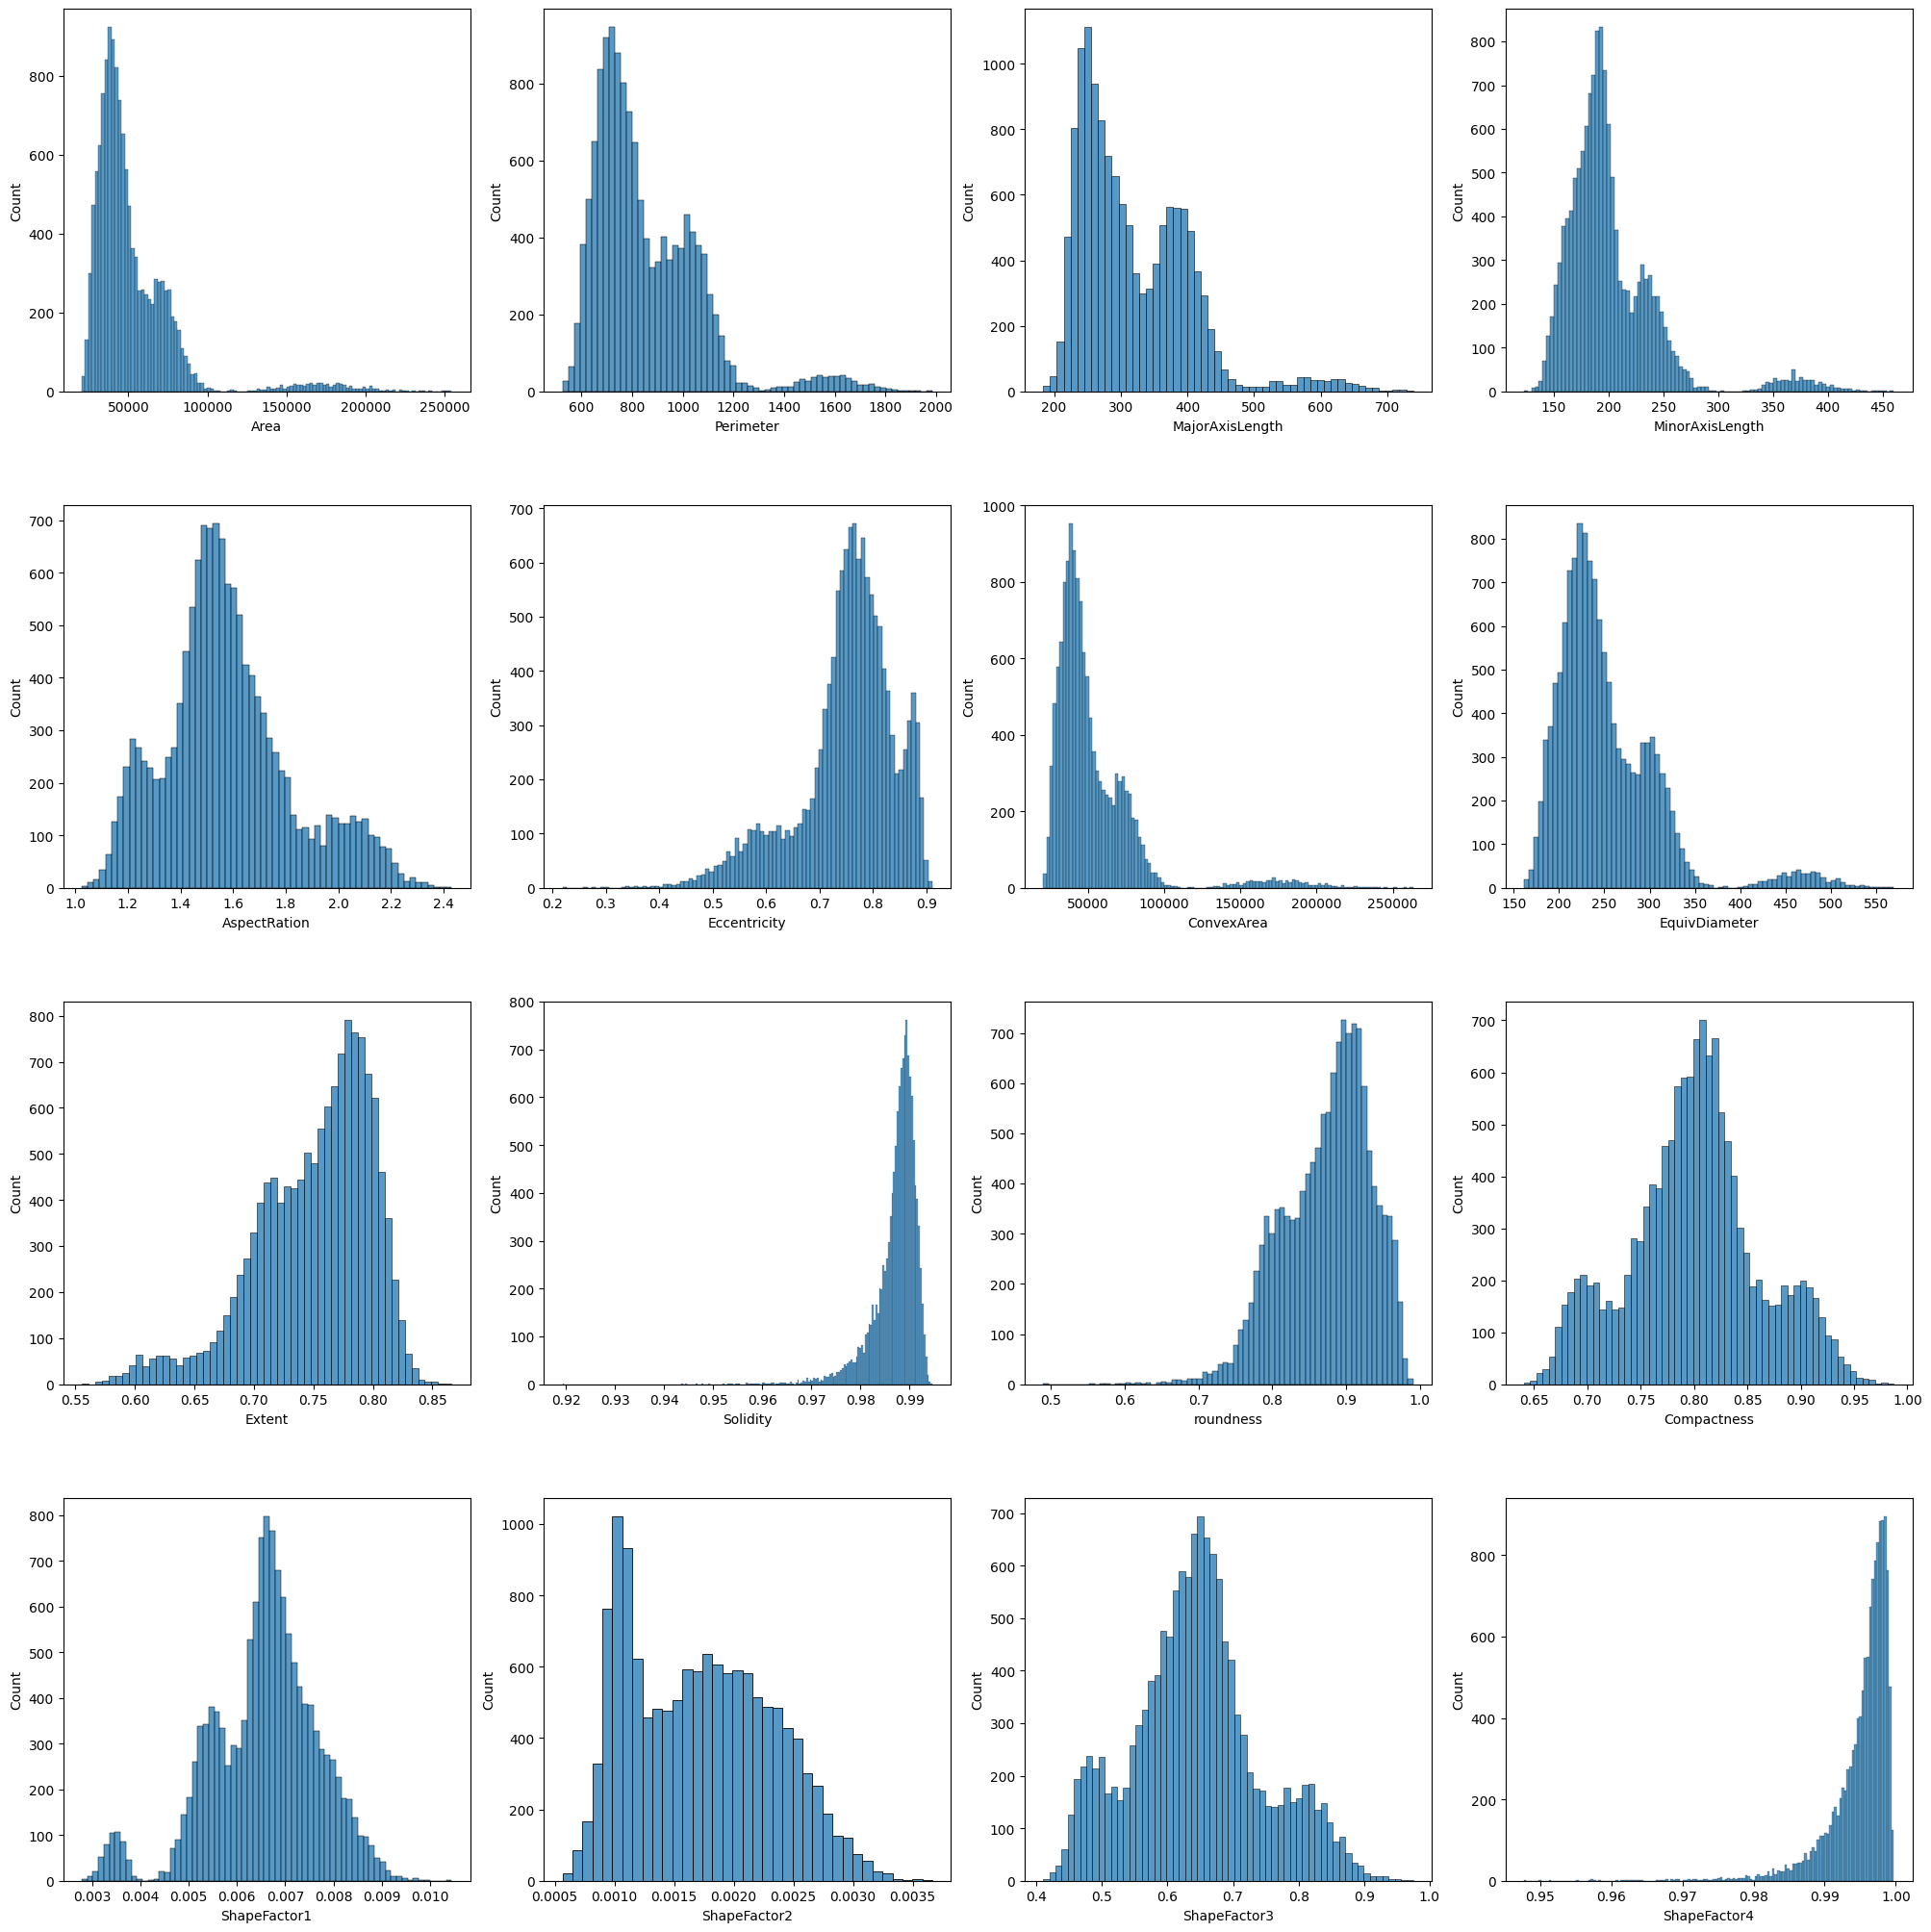

In [19]:
X = df.drop(['Class'], axis=1)
fig, axs = plt.subplots(ncols = 4, nrows = 4, figsize = (20, 20))
index = 0

axs = axs.flatten()
for k, v in X.items():
     sns.histplot(v, ax = axs[index])
     index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

In [79]:
# skewplot = df.Perimeter.plot(kind="density",
#               figsize=(7,5),
#               xlim=(df.Perimeter.min(),df.Perimeter.max()));
# plt.vlines(df.Perimeter.mean(), 
#            ymin=0, 
#            ymax=0.01,
#            linewidth=5.0,
#            color="black");
# plt.vlines(df.Perimeter.median(),
#            ymin=0, 
#            ymax=0.01, 
#            linewidth=2.0,
#            color="red");

# plt.show()

## Tretman outliera

### Detekcija Outliera

Area
Skewness :  2.947


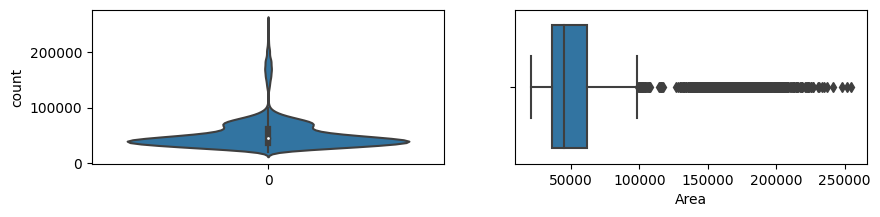

Perimeter
Skewness :  1.628


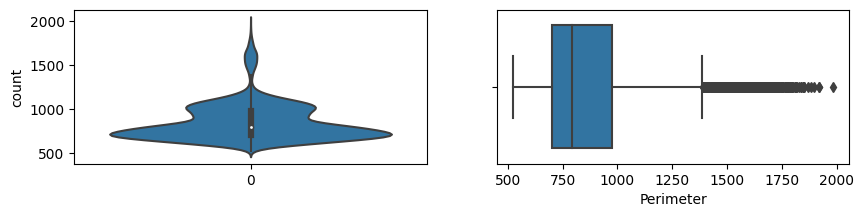

MajorAxisLength
Skewness :  1.366


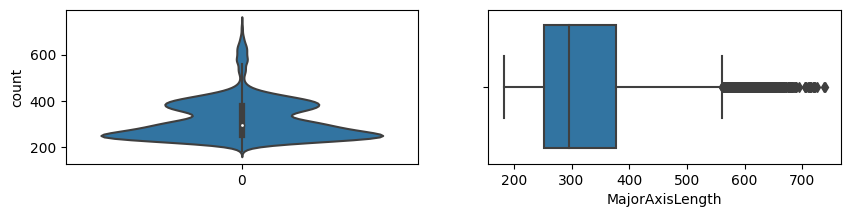

MinorAxisLength
Skewness :  2.232


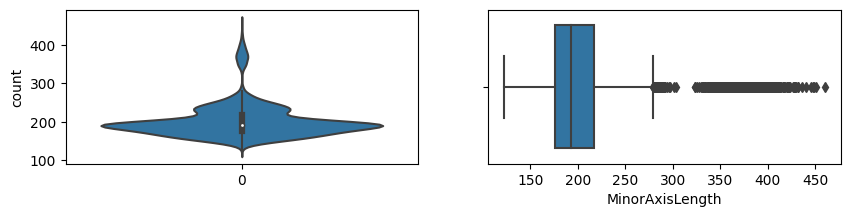

AspectRation
Skewness :  0.589


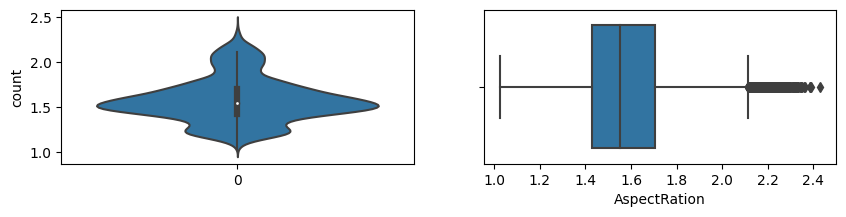

Eccentricity
Skewness :  -1.065


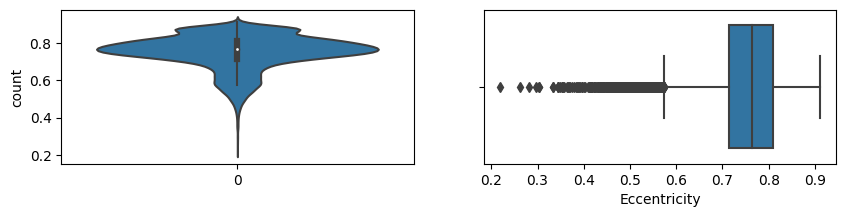

ConvexArea
Skewness :  2.936


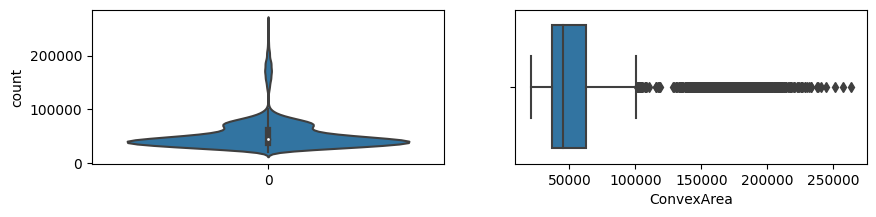

EquivDiameter
Skewness :  1.947


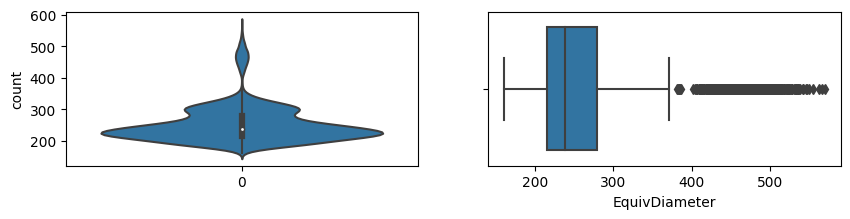

Extent
Skewness :  -0.896


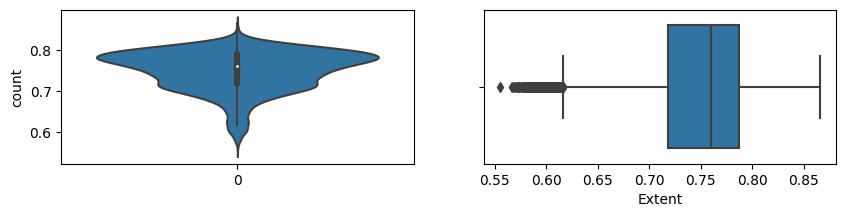

Solidity
Skewness :  -2.547


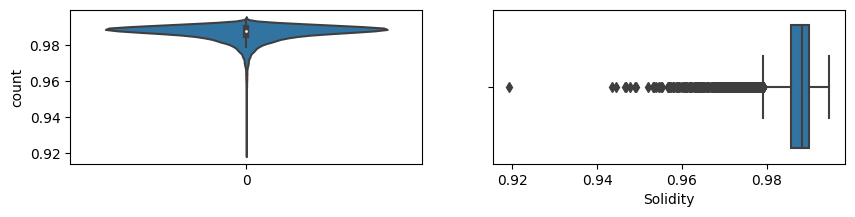

roundness
Skewness :  -0.649


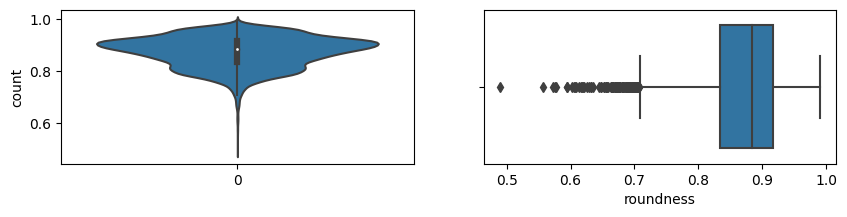

Compactness
Skewness :  0.036


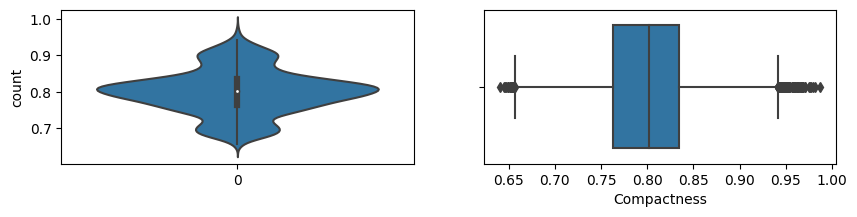

ShapeFactor1
Skewness :  -0.53


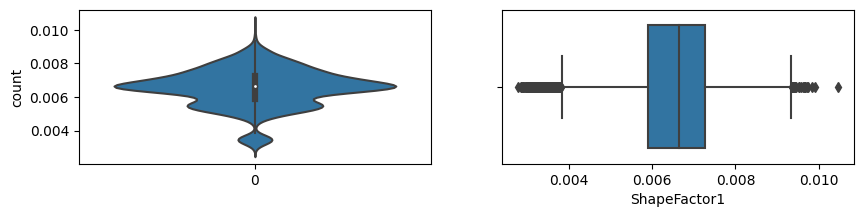

ShapeFactor2
Skewness :  0.294


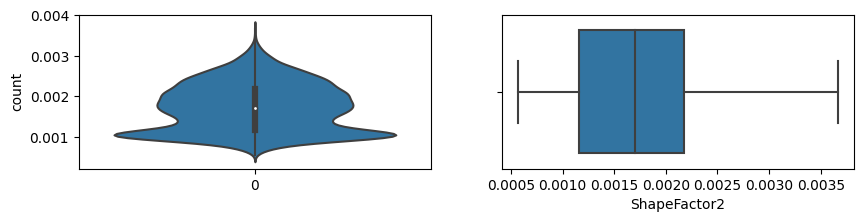

ShapeFactor3
Skewness :  0.243


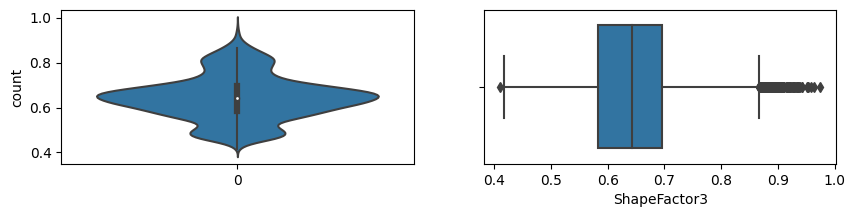

ShapeFactor4
Skewness :  -2.76


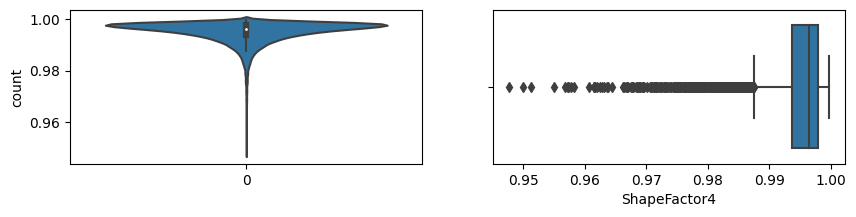

In [21]:
for i in df:
    if i !='Class':
        print(i)
        print("Skewness : ", round(df[i].skew(),3))
        plt.figure(figsize=(10,2))
        plt.subplot(1,2,1)
        sns.violinplot(df[i])
        plt.ylabel('count')
        plt.subplot(1,2,2)
        sns.boxplot(x=df[i])
        plt.show()    

### Izbacivanje Outliera

In [80]:
def remove_outliers(df):
    for col in df.columns:
        if col != 'Class':
            q25 = np.percentile(df[col] , 25)
            q75 = np.percentile(df[col] , 75)
            iqr = q75 - q25
            cut_off = iqr * 1.5
            lo = q25 - cut_off
            up = q75 + cut_off
            df[col] = df[col].clip(upper = up)
            df[col] = df[col].clip(lower=lo)

In [23]:
remove_outliers(df)

Area
Skewness :  2.953


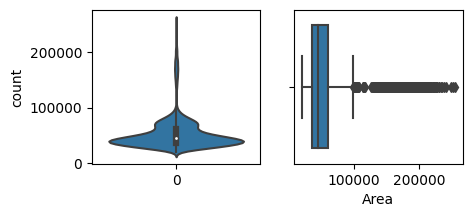

Perimeter
Skewness :  1.626


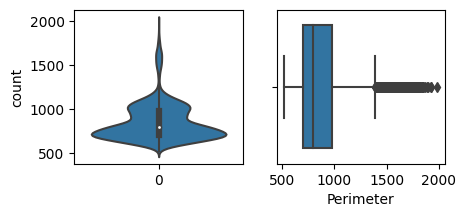

MajorAxisLength
Skewness :  1.358


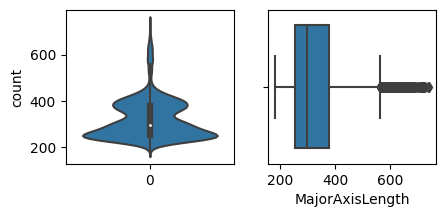

MinorAxisLength
Skewness :  2.238


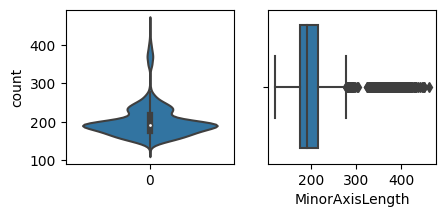

AspectRation
Skewness :  0.583


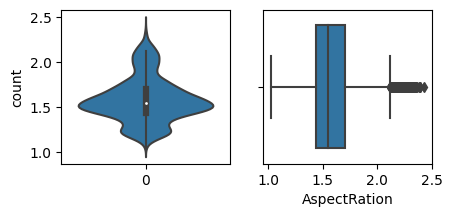

Eccentricity
Skewness :  -1.063


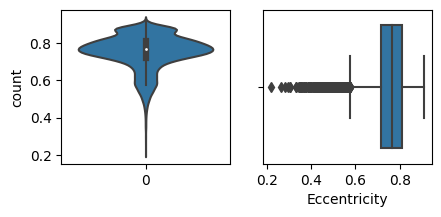

ConvexArea
Skewness :  2.942


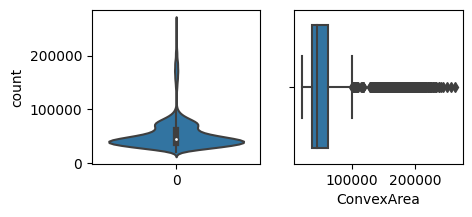

EquivDiameter
Skewness :  1.949


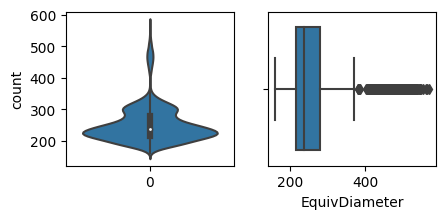

Extent
Skewness :  -0.895


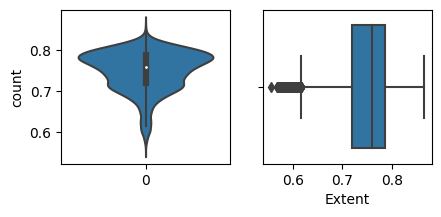

Solidity
Skewness :  -2.55


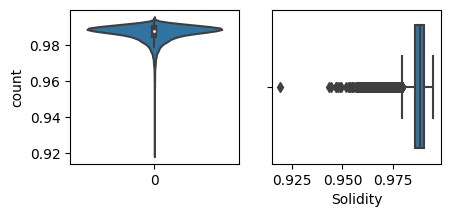

roundness
Skewness :  -0.636


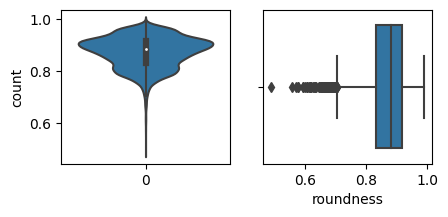

Compactness
Skewness :  0.037


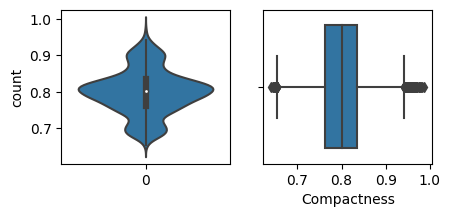

ShapeFactor1
Skewness :  -0.534


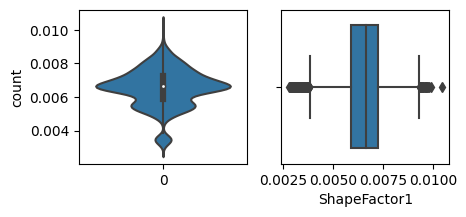

ShapeFactor2
Skewness :  0.301


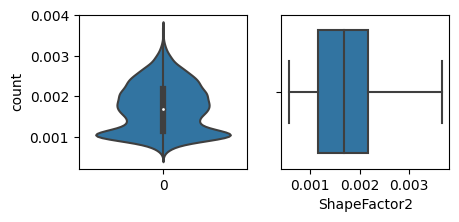

ShapeFactor3
Skewness :  0.242


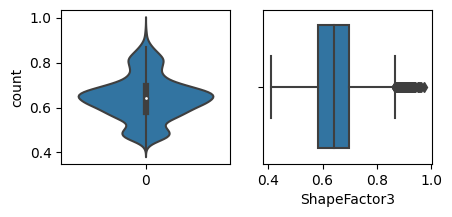

ShapeFactor4
Skewness :  -2.759


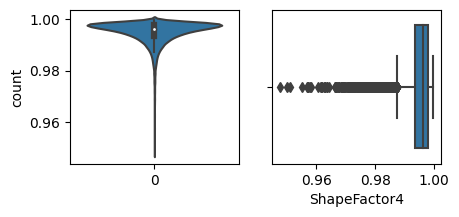

In [81]:
for i in df:
    if i !='Class':
        print(i)
        print("Skewness : ", round(df[i].skew(),3))
        plt.figure(figsize=(10,2))
        plt.subplot(1,4,1)
        sns.violinplot(df[i])
        plt.ylabel('count')
        plt.subplot(1,4,2)
        sns.boxplot(x=df[i])
        plt.show() 

## Izbacivanje visoko korelisanih fičera

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 [Text(0.5, 0, 'Area'),
  Text(1.5, 0, 'Perimeter'),
  Text(2.5, 0, 'MajorAxisLength'),
  Text(3.5, 0, 'MinorAxisLength'),
  Text(4.5, 0, 'AspectRation'),
  Text(5.5, 0, 'Eccentricity'),
  Text(6.5, 0, 'ConvexArea'),
  Text(7.5, 0, 'EquivDiameter'),
  Text(8.5, 0, 'Extent'),
  Text(9.5, 0, 'Solidity'),
  Text(10.5, 0, 'roundness'),
  Text(11.5, 0, 'Compactness'),
  Text(12.5, 0, 'ShapeFactor1'),
  Text(13.5, 0, 'ShapeFactor2'),
  Text(14.5, 0, 'ShapeFactor3'),
  Text(15.5, 0, 'ShapeFactor4'),
  Text(16.5, 0, 'Class')])

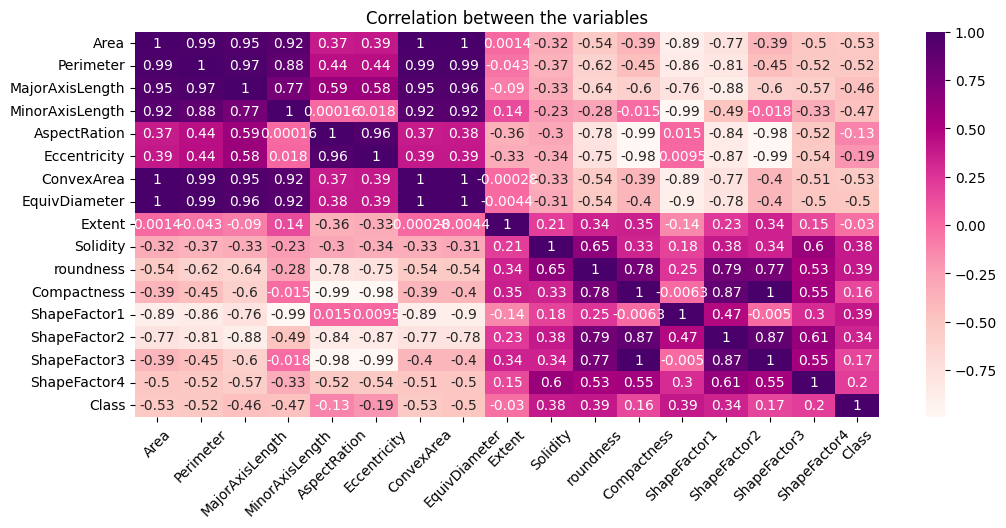

In [25]:
plt.subplots(figsize=(12,5))    #korelacija izmedju podataka
gender_correlation=df.corr()
sns.heatmap(gender_correlation,annot=True,cmap='RdPu')
plt.title('Correlation between the variables')
plt.xticks(rotation=45)

In [26]:
# df = pd.DataFrame(df, columns=df.columns[:16])

# columns_to_drop = ['ConvexArea', 'EquivDiameter', 'ShapeFactor3']
# df.drop(columns=columns_to_drop, inplace=True)

## Primena algoritama nadgledanog učenja

### Podela na skupove za treniranje i testiranje

In [82]:
from sklearn.model_selection import train_test_split

data=df.values
X=data[:,0:16]
y=data[:,16]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

print(f"Broj uzoraka u trening skupu podataka: {len(X_train)}")
print(f"Broj uzoraka u test skupu podataka: {len(X_test)}")

Broj uzoraka u trening skupu podataka: 9527
Broj uzoraka u test skupu podataka: 4084


### Lazy Classifier za evaluaciju modela

In [28]:
from lazypredict.Supervised import LazyClassifier
# Creating the LazyClassifier object
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

In [29]:
# Fitting the model on the training data
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

  0%|          | 0/29 [00:00<?, ?it/s]

 97%|█████████▋| 28/29 [00:38<00:01,  1.19s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 9480, number of used features: 16
[LightGBM] [Info] Start training from score -2.301531
[LightGBM] [Info] Start training from score -3.243437
[LightGBM] [Info] Start training from score -2.116403
[LightGBM] [Info] Start training from score -1.353096
[LightGBM] [Info] Start training from score -1.975348
[LightGBM] [Info] Start training from score -1.900642
[LightGBM] [Info] Start training from score -1.641051
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

100%|██████████| 29/29 [00:40<00:00,  1.39s/it]


In [30]:
print(models)

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
SVC                                0.93               0.94    None      0.93   
LGBMClassifier                     0.93               0.94    None      0.93   
XGBClassifier                      0.93               0.94    None      0.93   
LogisticRegression                 0.92               0.93    None      0.92   
LinearSVC                          0.92               0.93    None      0.92   
CalibratedClassifierCV             0.92               0.93    None      0.92   
RandomForestClassifier             0.92               0.93    None      0.92   
ExtraTreesClassifier               0.92               0.93    None      0.92   
KNeighborsClassifier               0.92               0.93    None      0.92   
BaggingClassifier                  0.92               0.93    None      0.92   
SGDClassifier                      0.91 

### LGBM Classifier

In [120]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

lgbm_model = LGBMClassifier(verbose=-1)

lgbm_model.fit(X_train, y_train)

y_pred = lgbm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9261843554902681


In [119]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

lgbm_model2 = make_pipeline(StandardScaler(), LGBMClassifier(verbose=-1))

cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(lgbm_model2, X, y, cv=cv, scoring='accuracy')

average_cv_accuracy = np.mean(cv_scores)
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")



Average Cross-validated Accuracy: 92.70%


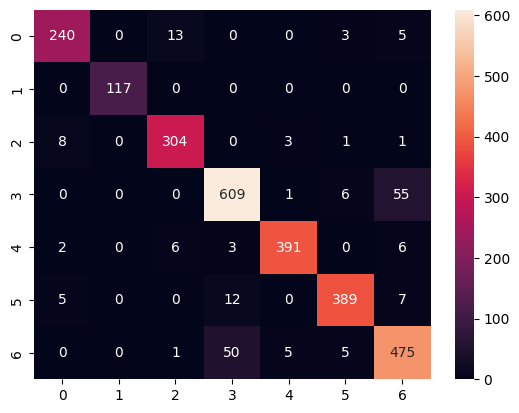

              precision    recall  f1-score   support

    BARBUNYA       0.94      0.92      0.93       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.94      0.96      0.95       317
    DERMASON       0.90      0.91      0.91       671
       HOROZ       0.98      0.96      0.97       408
       SEKER       0.96      0.94      0.95       413
        SIRA       0.87      0.89      0.88       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



In [101]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

print(classification_report(y_test, y_pred))

### XGBC Classifier

In [127]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

le = LabelEncoder()
y_encoded = le.fit_transform(y)

xgb_model = make_pipeline(StandardScaler(), XGBClassifier())

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 92.62%


In [128]:
xgbc_model = make_pipeline(StandardScaler(), XGBClassifier(verbose=-1))

cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(xgbc_model, X, y_encoded, cv=cv, scoring='accuracy')

average_cv_accuracy = np.mean(cv_scores)
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")


Average Cross-validated Accuracy: 92.65%


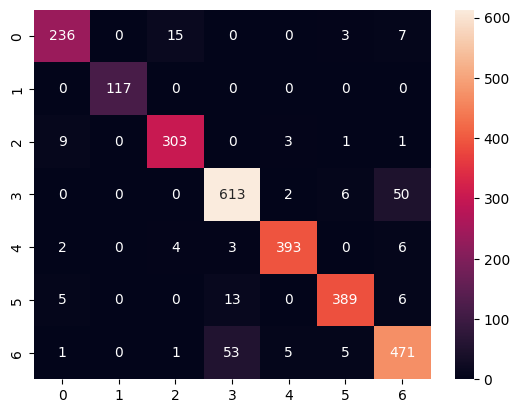

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       261
           1       1.00      1.00      1.00       117
           2       0.94      0.96      0.95       317
           3       0.90      0.91      0.91       671
           4       0.98      0.96      0.97       408
           5       0.96      0.94      0.95       413
           6       0.87      0.88      0.87       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



In [129]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

print(classification_report(y_test, y_pred))

### DECISION TREE

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

stdscalar=StandardScaler()
X_train=stdscalar.fit_transform(X_train)
X_test=stdscalar.transform(X_test)
dtree=DecisionTreeClassifier(ccp_alpha=0, criterion='entropy',
                       min_samples_split=3, random_state=0,max_depth=4)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0, criterion='entropy', max_depth=4,
                       min_samples_split=3, random_state=0)

In [111]:
from sklearn.metrics import accuracy_score
pred_dtree=dtree.predict(X_test)
accuracy_score(y_test,pred_dtree)

0.8604480352552332

In [112]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(dtree, X, y, cv=cv, scoring='accuracy')
average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")


Average Cross-validated Accuracy: 86.22%


              precision    recall  f1-score   support

           0       0.82      0.62      0.71       261
           1       1.00      1.00      1.00       117
           2       0.77      0.88      0.82       317
           3       0.83      0.91      0.87       671
           4       0.95      0.95      0.95       408
           5       0.96      0.91      0.94       413
           6       0.80      0.77      0.79       536

    accuracy                           0.86      2723
   macro avg       0.88      0.86      0.87      2723
weighted avg       0.86      0.86      0.86      2723



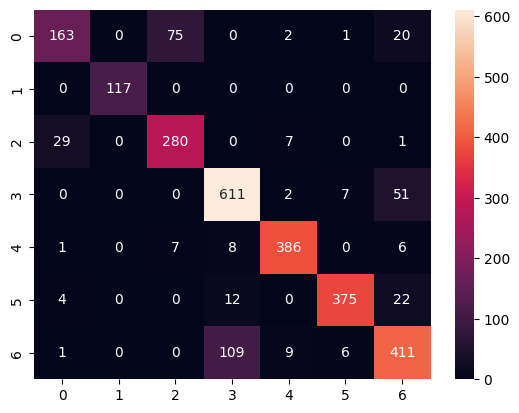

In [113]:
from sklearn.metrics import classification_report
cm=pd.DataFrame(confusion_matrix(y_test, pred_dtree))
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, pred_dtree))
plt.show()

In [36]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute error of decision tree",mean_absolute_error(y_test, pred_dtree))

Mean Absolute error of decision tree 0.38887521535810976


In [99]:
# plt.figure(figsize=(15,15))
# from sklearn import tree
# tree.plot_tree(dtree)

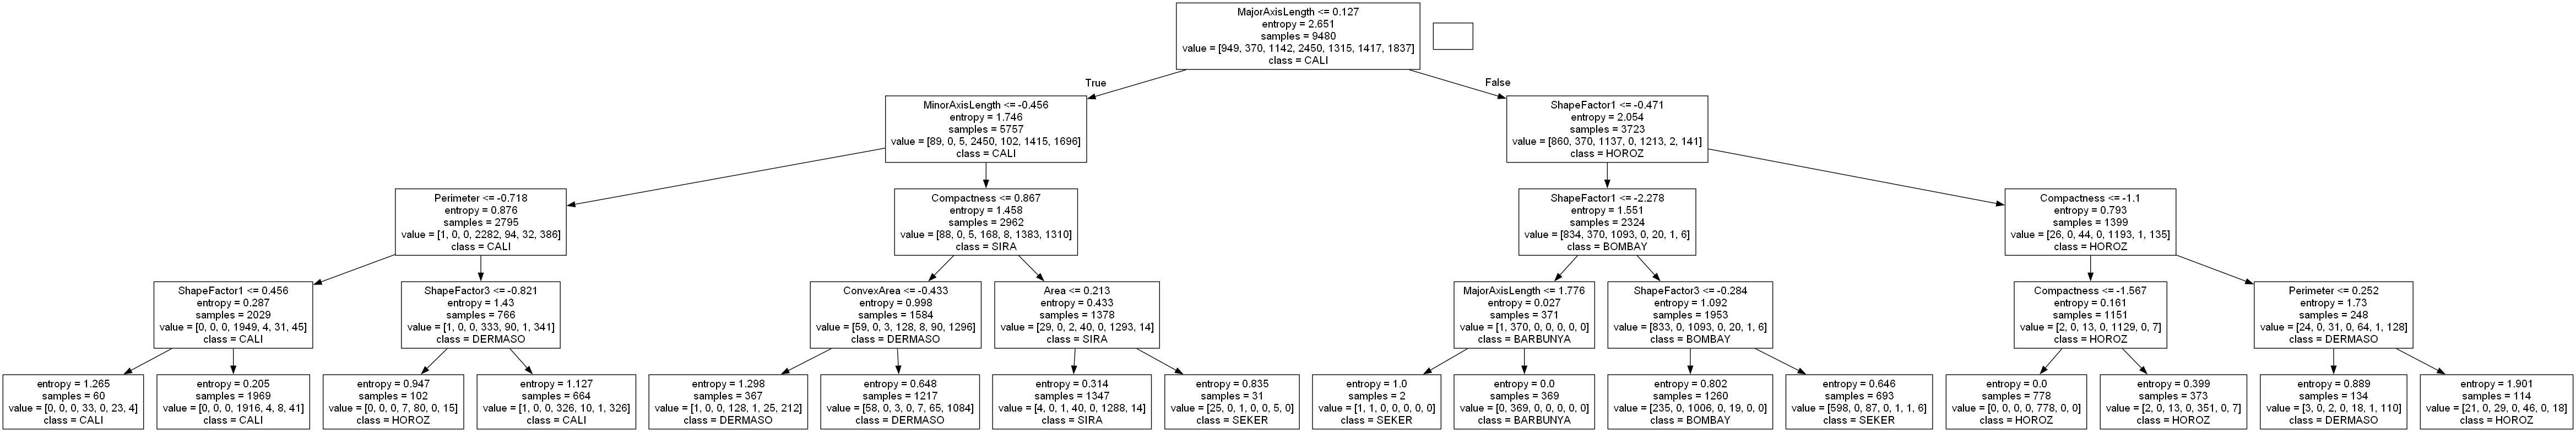

In [38]:
import pydotplus
from sklearn import tree
from IPython.display import Image

cols = [col for col in df.columns if col not in ['Class']]
data_features = df[cols]
dot_data = tree.export_graphviz(dtree,
 out_file=None,
feature_names=data_features.columns,
 class_names=['SEKER','BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASO'])

graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_graphviz_executables({'dot': 'C:/Program Files/Graphviz/bin/dot.exe'})  # Putanja na Eminom racunaru

Image(graph.create_png())

### RANDOM FOREST

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfe=RandomForestClassifier()
rfeModel = rfe.fit(X_train,y_train)

In [40]:
pred_rfe=rfe.predict(X_test)
accuracy_score(y_test,pred_rfe)

0.9212404627122815

In [41]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rfe, X, y, cv=cv, scoring='accuracy')
average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")


Average Cross-validated Accuracy: 92.28%


              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91       373
         1.0       0.99      1.00      1.00       152
         2.0       0.93      0.95      0.94       488
         3.0       0.91      0.92      0.92      1096
         4.0       0.96      0.94      0.95       545
         5.0       0.94      0.95      0.95       610
         6.0       0.86      0.87      0.86       799

    accuracy                           0.92      4063
   macro avg       0.94      0.93      0.93      4063
weighted avg       0.92      0.92      0.92      4063



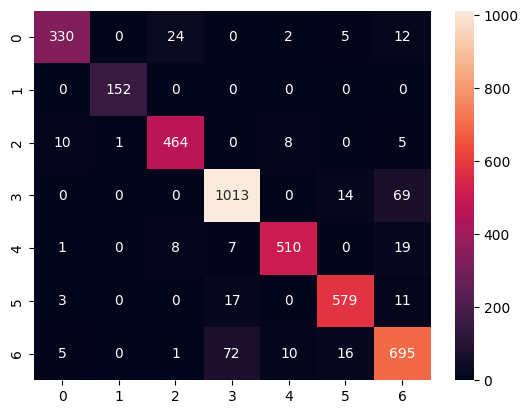

In [42]:
con=pd.DataFrame(confusion_matrix(y_test, pred_rfe))
sns.heatmap(con, annot=True, fmt='d')
print(classification_report(y_test, pred_rfe))
plt.show()

In [43]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute error of decision tree",mean_absolute_error(y_test, pred_rfe))

Mean Absolute error of decision tree 0.21068176224464683


#### Optimizacija RF modela izborom relevantnih atributa

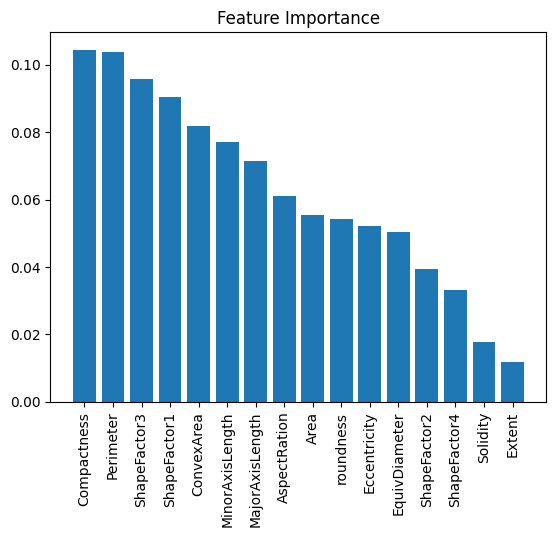

In [44]:
importances = rfeModel.feature_importances_
indices = np.argsort(importances)[::-1]
names = [data_features.columns[i] for i in indices]

plt.figure()

plt.title("Feature Importance")

plt.bar(range(X_train.shape[1]), importances[indices])

plt.xticks(range(X_train.shape[1]), names, rotation=90)

plt.show()

In [87]:
from sklearn.feature_selection import SelectFromModel


def selectFeaturesRF(th):
    selector = SelectFromModel(rfe, threshold=th) 

    features_important = selector.fit_transform(X_train, y_train)

    test_important = selector.transform(X_test)

    randomForestModel = rfe.fit(features_important, y_train)

    predRFC = randomForestModel.predict(test_important)

    print("RandomForest accuracy : ",accuracy_score(y_test, predRFC, normalize = True))
    print(confusion_matrix(y_test, predRFC))
    report = classification_report(y_test,predRFC, digits=5)

    return accuracy_score(y_test, predRFC)

accRFopt = selectFeaturesRF(0.015)

RandomForest accuracy :  0.9138099902056807
[[ 371    0   24    0    4    4    9]
 [   1  157    0    0    0    0    0]
 [  19    0  444    0    9    0    5]
 [   0    0    0 1004    0   16   59]
 [   3    0   13    5  539    0   11]
 [   2    0    0    7    0  552   21]
 [   3    0    4  116    9    8  665]]


### SVM

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import MinMaxScaler 

np.set_printoptions(edgeitems=127)

stdscaler=StandardScaler()  
X_train=stdscaler.fit_transform(X_train)
X_test=stdscaler.transform(X_test)

svm = SVC(C=10,kernel='rbf', gamma=0.1)
svm.fit(X_train,y_train)

SVC(C=10, gamma=0.1)

In [47]:
pred_svm=svm.predict(X_test)
print(accuracy_score(y_test,pred_svm))

0.9256706866847157


In [48]:
# from sklearn.model_selection import cross_val_score, KFold

# cv = KFold(n_splits=5, shuffle=True, random_state=42)
# cv_scores = cross_val_score(svm, X, y, cv=cv, scoring='accuracy')
# average_cv_accuracy = cv_scores.mean()
# print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")

In [49]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute error of decision tree",mean_absolute_error(y_test, pred_svm))

Mean Absolute error of decision tree 0.19788333743539258


              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93       373
         1.0       1.00      1.00      1.00       152
         2.0       0.93      0.96      0.94       488
         3.0       0.91      0.93      0.92      1096
         4.0       0.96      0.93      0.95       545
         5.0       0.96      0.96      0.96       610
         6.0       0.86      0.87      0.87       799

    accuracy                           0.93      4063
   macro avg       0.94      0.94      0.94      4063
weighted avg       0.93      0.93      0.93      4063



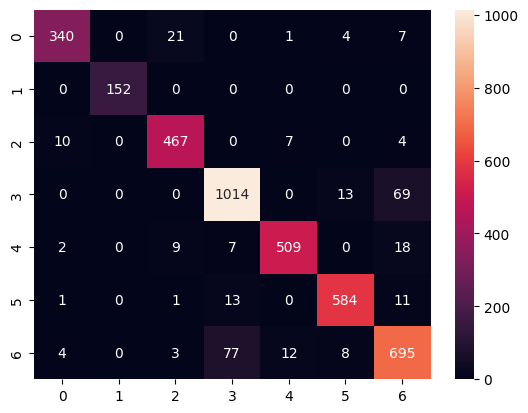

In [50]:
cm=pd.DataFrame(confusion_matrix(y_test, pred_svm))
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, pred_svm))
plt.show()

### LOGISTIC REGRESSION

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

lr=LogisticRegression(C=10)
stdscalar=StandardScaler()
X_train=stdscalar.fit_transform(X_train)
X_test=stdscalar.transform(X_test)

lr.fit(X_train,y_train)

LogisticRegression(C=10)

In [52]:
lr.score(X_test, y_test)

0.922224956928378

In [53]:
pred_lr=lr.predict(X_test)
accuracy_score(y_test, pred_lr)

0.922224956928378

In [54]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, pred_lr))

0.20108294363770612


              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93       373
         1.0       1.00      0.99      1.00       152
         2.0       0.94      0.95      0.94       488
         3.0       0.92      0.90      0.91      1096
         4.0       0.95      0.94      0.95       545
         5.0       0.95      0.96      0.95       610
         6.0       0.85      0.88      0.86       799

    accuracy                           0.92      4063
   macro avg       0.94      0.93      0.94      4063
weighted avg       0.92      0.92      0.92      4063



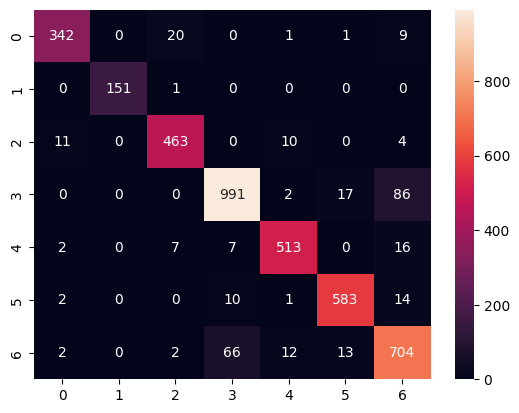

In [55]:
cm=pd.DataFrame(confusion_matrix(y_test, pred_lr))
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, pred_lr))
plt.show()

### NAIVE BAYES CLASSIFIER

In [56]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [57]:
pred_nb=gnb.predict(X_test)
accuracy_score(y_test,pred_nb)

0.8983509721880384

In [58]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(gnb, X, y, cv=cv, scoring='accuracy')
average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")


Average Cross-validated Accuracy: 76.73%


              precision    recall  f1-score   support

         0.0       0.88      0.81      0.84       373
         1.0       1.00      0.99      1.00       152
         2.0       0.88      0.92      0.90       488
         3.0       0.93      0.87      0.90      1096
         4.0       0.95      0.94      0.95       545
         5.0       0.93      0.95      0.94       610
         6.0       0.81      0.88      0.84       799

    accuracy                           0.90      4063
   macro avg       0.91      0.91      0.91      4063
weighted avg       0.90      0.90      0.90      4063



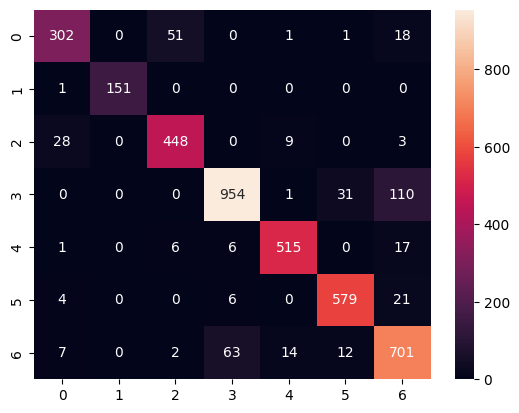

In [59]:
conm=pd.DataFrame(confusion_matrix(y_test, pred_nb))
sns.heatmap(conm, annot=True, fmt='d')
print(classification_report(y_test, pred_nb))
plt.show()

In [60]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute error of decision tree",mean_absolute_error(y_test, pred_nb))

Mean Absolute error of decision tree 0.26753630322421856


### KNN

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(X)
X_scaled = scaler.transform(X)

In [123]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

knn_clf_sk_3 = KNeighborsClassifier(n_neighbors=3)
knn_clf_sk_3.fit(X_train, y_train)
knn_clf_sk_3.score(X_test, y_test)

0.9254498714652957

In [124]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn_clf_sk_3, X_scaled, y, cv=cv, scoring='accuracy')
average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")


Average Cross-validated Accuracy: 91.87%


KNeighbors accuracy :  0.9254498714652957
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       261
           1       1.00      1.00      1.00       117
           2       0.92      0.96      0.94       317
           3       0.90      0.92      0.91       671
           4       0.97      0.95      0.96       408
           5       0.98      0.95      0.96       413
           6       0.86      0.87      0.87       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



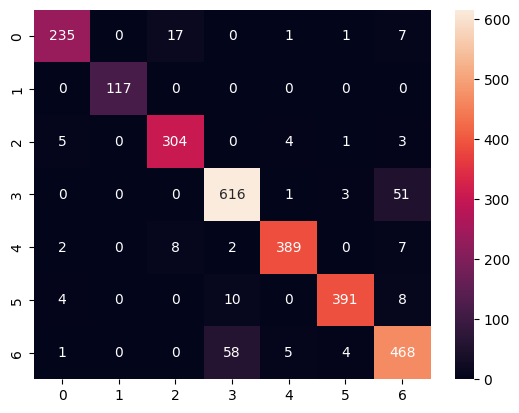

In [125]:
nnModel = knn_clf_sk_3.fit(X_train, y_train)

predNN = nnModel.predict(X_test)

print("KNeighbors accuracy : ",accuracy_score(y_test, predNN, normalize = True))

conm=pd.DataFrame(confusion_matrix(y_test, predNN))
sns.heatmap(conm, annot=True, fmt='d')
print(classification_report(y_test, predNN))
plt.show()

In [65]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute error of decision tree",mean_absolute_error(y_test, predNN))

Mean Absolute error of decision tree 0.22249569283780457


### Poredjenje rezultata različitih modela

In [131]:
print('Decision tree: ',(dtree.score(X_test, y_test)*100), '%')
print('\n')
print('KNN: ',(knn_clf_sk_3.score(X_test, y_test)*100),'%')
print('\n')
print('Random Forest:', (accRFopt) * 100)
print('\n')
print('Naive Bayes Classifier: ', (gnb.score(X_test, y_test)*100),'%')
print('\n')
print('Logistic Regresion: ', (lr.score(X_test, y_test)*100),'%')
print('\n')
print('SVM: ', (svm.score(X_test, y_test)*100),'%')
print('\n')
print('LGBM: ', (lgbm_model.score(X_test, y_test)*100),'%')
print('\n')
print('XGBC: ', (xgb_model.score(X_test, y_test)*100),'%')

Decision tree:  86.04480352552332 %


KNN:  92.54498714652956 %


Random Forest: 91.38099902056807


Naive Bayes Classifier:  84.90635328681601 %


Logistic Regresion:  90.92912229159016 %


SVM:  92.21446933529197 %


LGBM:  92.61843554902681 %


XGBC:  92.61843554902681 %


## UnderSampling

### Distribucija po klasama nakon undersampling-a

In [89]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

df = pd.read_excel('Dry_Bean_Dataset.xlsx')
X = df.drop('Class', axis=1)
y = df['Class']

print("Before UnderSampling, counts of 'DERMASON': {}".format(sum(y == 'DERMASON')))
print("Before UnderSampling, counts of 'SIRA': {}".format(sum(y == 'SIRA')))
print("Before UnderSampling, counts of 'SEKER': {}".format(sum(y == 'SEKER')))
print("Before UnderSampling, counts of 'HOROZ': {}".format(sum(y == 'HOROZ')))
print("Before UnderSampling, counts of 'CALI': {}".format(sum(y == 'CALI')))
print("Before UnderSampling, counts of 'BARBUNYA': {}".format(sum(y == 'BARBUNYA')))
print("Before UnderSampling, counts of 'BOMBAY': {}\n".format(sum(y == 'BOMBAY')))

from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X, y)

Numeric_cols = df.drop(columns=['Class']).columns
df_resampled = pd.DataFrame(X_resampled, columns=Numeric_cols)
df_resampled["Class"] = y_resampled

print("After UnderSampling, counts of 'DERMASON': {}".format(sum(y_resampled == 'DERMASON')))
print("After UnderSampling, counts of 'SIRA': {}".format(sum(y_resampled == 'SIRA')))
print("After UnderSampling, counts of 'SEKER': {}".format(sum(y_resampled == 'SEKER')))
print("After UnderSampling, counts of 'HOROZ': {}".format(sum(y_resampled == 'HOROZ')))
print("After UnderSampling, counts of 'CALI': {}".format(sum(y_resampled == 'CALI')))
print("After UnderSampling, counts of 'BARBUNYA': {}".format(sum(y_resampled == 'BARBUNYA')))
print("After UnderSampling, counts of 'BOMBAY': {}\n".format(sum(y_resampled == 'BOMBAY')))

Before UnderSampling, counts of 'DERMASON': 3546
Before UnderSampling, counts of 'SIRA': 2636
Before UnderSampling, counts of 'SEKER': 2027
Before UnderSampling, counts of 'HOROZ': 1928
Before UnderSampling, counts of 'CALI': 1630
Before UnderSampling, counts of 'BARBUNYA': 1322
Before UnderSampling, counts of 'BOMBAY': 522

After UnderSampling, counts of 'DERMASON': 522
After UnderSampling, counts of 'SIRA': 522
After UnderSampling, counts of 'SEKER': 522
After UnderSampling, counts of 'HOROZ': 522
After UnderSampling, counts of 'CALI': 522
After UnderSampling, counts of 'BARBUNYA': 522
After UnderSampling, counts of 'BOMBAY': 522



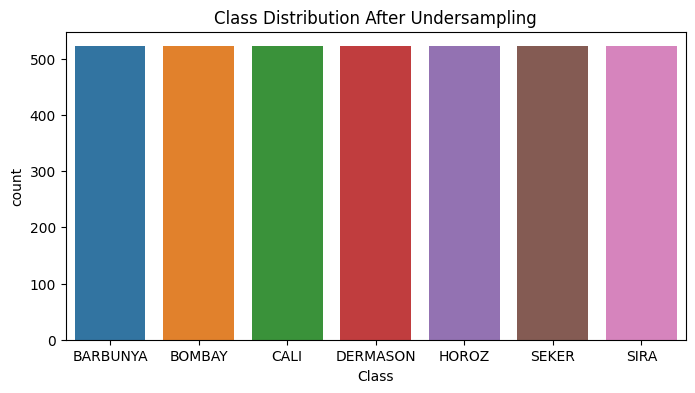

In [90]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Class', data=df_resampled)
plt.title("Class Distribution After Undersampling")
plt.show()

### RF UnderSampled

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Random forest after undersampling: {accuracy*100:.10f}")
# print("Confusion Matrix:\n", conf_matrix)
# print("Classification Report:\n", class_report)

cv_scores = cross_val_score(rf_classifier, X_resampled, y_resampled, cv=5, scoring='accuracy')

print("\nCross-validated Accuracy:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score*100:.2f}%")

average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")

Random forest after undersampling: 92.7496580027

Cross-validated Accuracy:
Fold 1: 92.07%
Fold 2: 92.20%
Fold 3: 94.53%
Fold 4: 93.57%
Fold 5: 92.05%

Average Cross-validated Accuracy: 92.88%


### DT UnderSampled

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Decision Tree after undersampling: {accuracy*100:.10f}")
# print("Confusion Matrix:\n", conf_matrix)
# print("Classification Report:\n", class_report)

cv_scores = cross_val_score(dt_classifier, X_resampled, y_resampled, cv=5, scoring='accuracy')

print("\nCross-validated Accuracy:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score*100:.2f}%")

average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")

Decision Tree after undersampling: 88.2352941176

Cross-validated Accuracy:
Fold 1: 89.88%
Fold 2: 89.06%
Fold 3: 91.24%
Fold 4: 91.79%
Fold 5: 91.10%

Average Cross-validated Accuracy: 90.61%


### LGBM UnderSampled

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

lgbm_classifier = LGBMClassifier(random_state=42, verbose=-1)
lgbm_classifier.fit(X_train, y_train)

y_pred = lgbm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"LGBM after undersampling: {accuracy*100:.10f}")

cv_scores = cross_val_score(lgbm_classifier, X_resampled, y_resampled, cv=5, scoring='accuracy')

print("\nCross-validated Accuracy:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score*100:.2f}%")

average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")



LGBM after undersampling: 93.1600547196

Cross-validated Accuracy:
Fold 1: 93.57%
Fold 2: 92.75%
Fold 3: 94.66%
Fold 4: 93.43%
Fold 5: 92.60%

Average Cross-validated Accuracy: 93.40%


In [140]:
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

x_data = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

xgboost_classifier = XGBClassifier(random_state=42, verbosity=0)
xgboost_classifier.fit(X_train, y_train)

y_pred = xgboost_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"XGBoost after undersampling: {accuracy*100:.10f}")

cv_scores = cross_val_score(xgboost_classifier, X_resampled, y_resampled, cv=5, scoring='accuracy')

print("\nCross-validated Accuracy:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score*100:.2f}%")

average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6], got ['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']

## SMOTE OverSampling

### Distribucija po klasama nakon oversampling-a

In [71]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Split the dataset into training and testing sets
df = pd.read_excel('Dry_Bean_Dataset.xlsx')
X = df.drop('Class', axis=1)
y = df['Class']

print("Before OverSampling, counts of 'DERMASON': {}".format(sum(y == 'DERMASON')))
print("Before OverSampling, counts of 'SIRA': {}".format(sum(y == 'SIRA')))
print("Before OverSampling, counts of 'SEKER': {}".format(sum(y == 'SEKER')))
print("Before OverSampling, counts of 'HOROZ': {}".format(sum(y == 'HOROZ')))
print("Before OverSampling, counts of 'CALI': {}".format(sum(y == 'CALI')))
print("Before OverSampling, counts of 'BARBUNYA': {}".format(sum(y == 'BARBUNYA')))
print("Before OverSampling, counts of 'BOMBAY': {}\n".format(sum(y == 'BOMBAY')))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_res, y_res = sm.fit_resample(X, y.ravel())

print("After OverSampling, counts of 'DERMASON': {}".format(sum(y_res == 'DERMASON')))
print("After OverSampling, counts of 'SIRA': {}".format(sum(y_res == 'SIRA')))
print("After OverSampling, counts of 'SEKER': {}".format(sum(y_res == 'SEKER')))
print("After OverSampling, counts of 'HOROZ': {}".format(sum(y_res == 'HOROZ')))
print("After OverSampling, counts of 'CALI': {}".format(sum(y_res == 'CALI')))
print("After OverSampling, counts of 'BARBUNYA': {}".format(sum(y_res == 'BARBUNYA')))
print("After OverSampling, counts of 'BOMBAY': {}\n".format(sum(y_res == 'BOMBAY')))

Before OverSampling, counts of 'DERMASON': 3546
Before OverSampling, counts of 'SIRA': 2636
Before OverSampling, counts of 'SEKER': 2027
Before OverSampling, counts of 'HOROZ': 1928
Before OverSampling, counts of 'CALI': 1630
Before OverSampling, counts of 'BARBUNYA': 1322
Before OverSampling, counts of 'BOMBAY': 522

After OverSampling, counts of 'DERMASON': 3546
After OverSampling, counts of 'SIRA': 3546
After OverSampling, counts of 'SEKER': 3546
After OverSampling, counts of 'HOROZ': 3546
After OverSampling, counts of 'CALI': 3546
After OverSampling, counts of 'BARBUNYA': 3546
After OverSampling, counts of 'BOMBAY': 3546



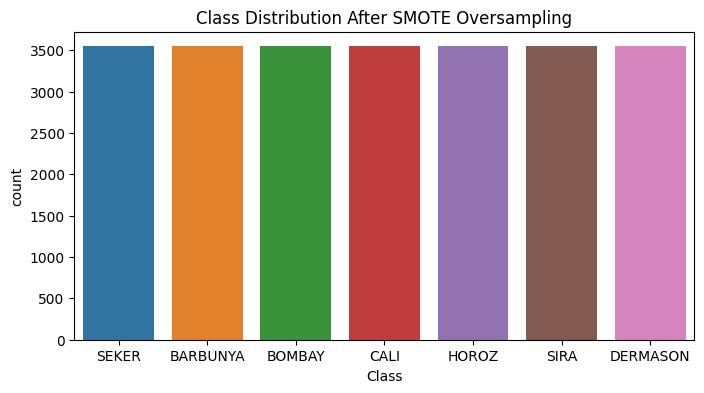

In [72]:
import seaborn as sns
# Create a new DataFrame with the resampled data
Numeric_cols = df.drop(columns=['Class']).columns
df_resampled = pd.DataFrame(X_res, columns=Numeric_cols)
df_resampled["Class"] = y_res

# Plot the class distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='Class', data=df_resampled)
plt.title("Class Distribution After SMOTE Oversampling")
plt.show()

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Split the dataset into training and testing sets
X = df.drop('Class', axis=1)
y = df['Class']

# Normalize numerical values into ranges
scaler = MinMaxScaler()

# Select the columns you want to scale
columns_to_scale =  df.columns[:-1]

# Fit the scaler on the selected columns
scaler.fit(df[columns_to_scale])

# Transform the selected columns using the scaler
df[columns_to_scale] = scaler.transform(df[columns_to_scale])

### RF OverSampled

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_excel('Dry_Bean_Dataset.xlsx')
x_data = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size=0.2, random_state=42)

rf_selected = RandomForestClassifier()
rf_selected.fit(X_train, y_train)

cv_scores = cross_val_score(rf_selected, X_train, y_train, cv=7)  

accuracy = rf_selected.score(X_test, y_test)
formatted_accuracy = format(accuracy, '.0%')
print("Accuracy (without cross-validation):", formatted_accuracy)

#X_merged_df = X_train.append(X_test)
#y_merged_df = y_train.append(y_test)

X_merged_df = pd.concat([X_train, X_test], axis=0, ignore_index=True)
y_merged_df = pd.concat([y_train, y_test], axis=0, ignore_index=True)

cv_scores = cross_val_score(rf_selected, X_merged_df, y_merged_df, cv=5) 
average_accuracy = cv_scores.mean()
formatted_cv_accuracy = format(average_accuracy, '.0%')
print("Cross-validated Accuracy:", formatted_cv_accuracy)

Accuracy (without cross-validation): 92%
Cross-validated Accuracy: 92%


In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x_data = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
formatted_accuracy = format(accuracy, '.0%')
print("Accuracy (without cross-validation):", formatted_accuracy)

#X_merged_df = X_train.append(X_test)
#y_merged_df = y_train.append(y_test)

X_merged_df = pd.concat([X_train, X_test], axis=0, ignore_index=True)
y_merged_df = pd.concat([y_train, y_test], axis=0, ignore_index=True)

cv_scores = cross_val_score(knn, X_merged_df, y_merged_df, cv=5)  
average_accuracy = cv_scores.mean()
formatted_cv_accuracy = format(average_accuracy, '.0%')
print("Cross-validated Accuracy:", formatted_cv_accuracy)

Accuracy (without cross-validation): 72%
Cross-validated Accuracy: 73%


### DT OverSampled

In [94]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

x_data = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
formatted_accuracy = format(accuracy, '.0%')
print("Accuracy (without cross-validation):", formatted_accuracy)

#X_merged_df = X_train.append(X_test)
#y_merged_df = y_train.append(y_test)

X_merged_df = pd.concat([X_train, X_test], axis=0, ignore_index=True)
y_merged_df = pd.concat([y_train, y_test], axis=0, ignore_index=True)

cv_scores = cross_val_score(dt_model, X_merged_df, y_merged_df, cv=5)  
average_accuracy = cv_scores.mean()
formatted_cv_accuracy = format(average_accuracy, '.0%')
print("Cross-validated Accuracy:", formatted_cv_accuracy)

Accuracy (without cross-validation): 89%
Cross-validated Accuracy: 89%


### LGBM OverSampled

In [134]:
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

x_data = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size=0.2, random_state=42)

lgbm_model = LGBMClassifier(verbose=-1)
lgbm_model.fit(X_train, y_train)

y_pred = lgbm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
formatted_accuracy = format(accuracy, '.0%')
print("Accuracy (without cross-validation):", formatted_accuracy)

X_merged_df = pd.concat([X_train, X_test], axis=0, ignore_index=True)
y_merged_df = pd.concat([y_train, y_test], axis=0, ignore_index=True)

cv_scores = cross_val_score(lgbm_model, X_merged_df, y_merged_df, cv=5)  
average_accuracy = cv_scores.mean()
formatted_cv_accuracy = format(average_accuracy, '.2%')
print("Cross-validated Accuracy:", formatted_cv_accuracy)


Accuracy (without cross-validation): 93%
Cross-validated Accuracy: 92.76%


### XGBM OverSampled

In [136]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

x_data = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size=0.2, random_state=42)

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
formatted_accuracy = format(accuracy, '.0%')
print("Accuracy (without cross-validation):", formatted_accuracy)

X_merged_df = pd.concat([X_train, X_test], axis=0, ignore_index=True)
y_merged_df = pd.concat([y_train, y_test], axis=0, ignore_index=True)

cv_scores = cross_val_score(xgb_model, X_merged_df, y_merged_df, cv=5)  
average_accuracy = cv_scores.mean()
formatted_cv_accuracy = format(average_accuracy, '.2%')
print("Cross-validated Accuracy:", formatted_cv_accuracy)

Accuracy (without cross-validation): 92%
Cross-validated Accuracy: 92.79%


## Podešavanje hiperparametara

### DT 

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#param = {
#    'criterion': ['gini'],
#    'max_depth': [i for i in range(20, 101, 10)], # [30, 50, 60, 100]
#    'min_samples_leaf': [i for i in range(2, 11, 1)], # [2, 3, 5, 10]
#    'min_impurity_decrease': [0.1, 0.2, 0.3, 0.4, 0.5] # [0.1, 0.2, 0.5]
#}

param = {'max_depth': [3, 5, 7, 9, 12, 15, 17], 'min_samples_leaf': [10, 50, 100, 150, 250, 300]}
# param = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [i for i in range(3, 10)],
#     'min_samples_leaf': [i for i in range(1, 6)],
#     'min_impurity_decrease': [0.1, 0.2, 0.3, 0.4, 0.5]
# }
#grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param, cv=6) # default scoring: accuracy_score
grid= GridSearchCV(DecisionTreeClassifier(), param_grid=param, cv=5)
grid.fit(X_train, y_train)
print('\n Best DT Classifier:', grid.best_params_, '\n\Best Score:', grid.best_score_)  


 Best DT Classifier: {'max_depth': 9, 'min_samples_leaf': 10} 
\Best Score: 0.9061345909928196


### RF

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param = {'max_depth': [15, 17, 20], 'min_samples_leaf': [10],
     'n_estimators': [100, 200, 300]}

grid= GridSearchCV(RandomForestClassifier(), param_grid=param, cv=5)
grid.fit(X_train, y_train)
print('\n Best RF Classifier:', grid.best_params_, '\n\Best Score:', grid.best_score_)  


 Best RF Classifier: {'max_depth': 15, 'min_samples_leaf': 10, 'n_estimators': 200} 
\Best Score: 0.9211977375964514


### KNN

In [99]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import uniform, randint

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()

param_dist = {
    'n_neighbors': randint(1, 20),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}


random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_scaled, y_train)


print("Best Hyperparameters: ", random_search.best_params_)
print("Best Accuracy: {:.2f}%".format(random_search.best_score_ * 100))

Best Hyperparameters:  {'algorithm': 'ball_tree', 'n_neighbors': 6, 'p': 2, 'weights': 'distance'}
Best Accuracy: 92.51%


### LR

In [82]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform, randint

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()

param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': uniform(0.1, 10),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': randint(50, 200),
    'multi_class':['ovr', 'multinomial']
}

random_search = RandomizedSearchCV(
    log_reg,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42
)
random_search.fit(X_train_scaled, y_train)

print("Best Hyperparameters: ", random_search.best_params_)
print("Best Accuracy: {:.2f}%".format(random_search.best_score_ * 100))

Best Hyperparameters:  {'C': 0.30584494295802445, 'max_iter': 51, 'multi_class': 'multinomial', 'penalty': 'none', 'solver': 'lbfgs'}
Best Accuracy: 92.47%
